In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [437]:
%matplotlib inline

## Problem 1: ANOVA

### Dental implant data: The hardness of metal implant in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as on the dentists who may favour one method above another and may work better in his/her favourite method. The response is the variable of interest.

In [438]:
data = pd.read_excel(r'C:\Users\User\Downloads\Dental_Hardness_data.xlsx')

In [439]:
data.head()

Dentist  Method  Alloy    Temp  Response  Unnamed: 5  Unnamed: 6  \
0      1.0     1.0    1.0  1500.0     813.0         NaN         NaN   
1      1.0     1.0    1.0  1600.0     792.0         NaN         NaN   
2      1.0     1.0    1.0  1700.0     792.0         NaN         NaN   
3      1.0     1.0    2.0  1500.0     907.0         NaN         NaN   
4      1.0     1.0    2.0  1600.0     792.0         NaN         NaN   

                              Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
0  Anova: Two-Factor Without Replication        NaN        NaN         NaN   
1                                    NaN        NaN        NaN         NaN   
2                                SUMMARY      Count        Sum     Average   
3                                      1          4       2315      578.75   
4                                      1          4       2394       598.5   

     Unnamed: 11 Unnamed: 12 Unnamed: 13  
0            NaN         NaN         NaN  
1            NaN         NaN         NaN  
2       Variance         NaN         NaN  
3  523721.583333         NaN         NaN  
4         584819         NaN         NaN

In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dentist      90 non-null     float64
 1   Method       90 non-null     float64
 2   Alloy        90 non-null     float64
 3   Temp         90 non-null     float64
 4   Response     90 non-null     float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   102 non-null    object 
 8   Unnamed: 8   100 non-null    object 
 9   Unnamed: 9   100 non-null    object 
 10  Unnamed: 10  99 non-null     object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  3 non-null      object 
dtypes: float64(7), object(7)
memory usage: 11.8+ KB


In [441]:
data.drop(data.columns[5:],axis=1,inplace=True)

In [442]:
data.head()

Dentist  Method  Alloy    Temp  Response
0      1.0     1.0    1.0  1500.0     813.0
1      1.0     1.0    1.0  1600.0     792.0
2      1.0     1.0    1.0  1700.0     792.0
3      1.0     1.0    2.0  1500.0     907.0
4      1.0     1.0    2.0  1600.0     792.0

In [443]:
data.isnull().sum()

Dentist     17
Method      17
Alloy       17
Temp        17
Response    17
dtype: int64

In [444]:
data.dropna(inplace=True)

In [445]:
data.isnull().sum()

Dentist     0
Method      0
Alloy       0
Temp        0
Response    0
dtype: int64

In [446]:
data.head()

Dentist  Method  Alloy    Temp  Response
0      1.0     1.0    1.0  1500.0     813.0
1      1.0     1.0    1.0  1600.0     792.0
2      1.0     1.0    1.0  1700.0     792.0
3      1.0     1.0    2.0  1500.0     907.0
4      1.0     1.0    2.0  1600.0     792.0

In [447]:
data.shape

(90, 5)

In [448]:
data['Method'].value_counts()

1.0    30
2.0    30
3.0    30
Name: Method, dtype: int64

In [449]:
data['Alloy'].value_counts()

1.0    45
2.0    45
Name: Alloy, dtype: int64

In [450]:
data['Dentist'].value_counts()

1.0    18
2.0    18
3.0    18
4.0    18
5.0    18
Name: Dentist, dtype: int64

In [451]:
data['Temp'].value_counts()

1500.0    30
1600.0    30
1700.0    30
Name: Temp, dtype: int64

In [452]:
#Converting the numbers in method,alloy & dentist to category with specific labels

In [453]:
data['Method'].replace(to_replace=1.0, value='METHOD_1', inplace=True)
data['Method'].replace(to_replace=2.0, value='METHOD_2', inplace=True)
data['Method'].replace(to_replace=3.0, value='METHOD_3', inplace=True)

In [454]:
data['Method'].value_counts()

METHOD_1    30
METHOD_2    30
METHOD_3    30
Name: Method, dtype: int64

In [455]:
data['Alloy'].replace(to_replace=1.0, value='ALLOY_1', inplace=True)
data['Alloy'].replace(to_replace=2.0, value='ALLOY_2', inplace=True)

In [456]:
data['Alloy'].value_counts()

ALLOY_1    45
ALLOY_2    45
Name: Alloy, dtype: int64

In [457]:
data['Dentist'].replace(to_replace=1.0, value='DENTIST_1', inplace=True)
data['Dentist'].replace(to_replace=2.0, value='DENTIST_2', inplace=True)
data['Dentist'].replace(to_replace=3.0, value='DENTIST_3', inplace=True)
data['Dentist'].replace(to_replace=4.0, value='DENTIST_4', inplace=True)
data['Dentist'].replace(to_replace=5.0, value='DENTIST_5', inplace=True)

In [458]:
data['Dentist'].value_counts()

DENTIST_1    18
DENTIST_2    18
DENTIST_3    18
DENTIST_4    18
DENTIST_5    18
Name: Dentist, dtype: int64

In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dentist   90 non-null     object 
 1   Method    90 non-null     object 
 2   Alloy     90 non-null     object 
 3   Temp      90 non-null     float64
 4   Response  90 non-null     float64
dtypes: float64(2), object(3)
memory usage: 4.2+ KB


In [460]:
df_al_1=data[data['Alloy']=='ALLOY_1']

In [461]:
df_al_1.head(5)

Dentist    Method    Alloy    Temp  Response
0  DENTIST_1  METHOD_1  ALLOY_1  1500.0     813.0
1  DENTIST_1  METHOD_1  ALLOY_1  1600.0     792.0
2  DENTIST_1  METHOD_1  ALLOY_1  1700.0     792.0
6  DENTIST_1  METHOD_2  ALLOY_1  1500.0     782.0
7  DENTIST_1  METHOD_2  ALLOY_1  1600.0     698.0

In [462]:
df_al_2=data[data['Alloy']=='ALLOY_2']

In [463]:
df_al_1.head(3)

Dentist    Method    Alloy    Temp  Response
0  DENTIST_1  METHOD_1  ALLOY_1  1500.0     813.0
1  DENTIST_1  METHOD_1  ALLOY_1  1600.0     792.0
2  DENTIST_1  METHOD_1  ALLOY_1  1700.0     792.0

In [464]:
df=pd.crosstab(data['Dentist'],data['Alloy'],values=data['Response'],aggfunc='mean')

In [465]:
df['ALLOY_1']

Dentist
DENTIST_1    749.888889
DENTIST_2    761.222222
DENTIST_3    717.555556
DENTIST_4    681.111111
DENTIST_5    627.666667
Name: ALLOY_1, dtype: float64

In [466]:
df['ALLOY_2']

Dentist
DENTIST_1    816.222222
DENTIST_2    812.111111
DENTIST_3    779.666667
DENTIST_4    746.222222
DENTIST_5    726.111111
Name: ALLOY_2, dtype: float64

In [467]:
df1 = data[(data['Alloy']=='ALLOY_1')&(data['Dentist']=='DENTIST_1')]
df2 = data[(data['Alloy']=='ALLOY_1')&(data['Dentist']=='DENTIST_2')]
df3 = data[(data['Alloy']=='ALLOY_1')&(data['Dentist']=='DENTIST_3')]
df4 = data[(data['Alloy']=='ALLOY_1')&(data['Dentist']=='DENTIST_4')]
df5 = data[(data['Alloy']=='ALLOY_1')&(data['Dentist']=='DENTIST_5')]
df6 = data[(data['Alloy']=='ALLOY_2')&(data['Dentist']=='DENTIST_1')]
df7 = data[(data['Alloy']=='ALLOY_2')&(data['Dentist']=='DENTIST_2')]
df8 = data[(data['Alloy']=='ALLOY_2')&(data['Dentist']=='DENTIST_3')]
df9 = data[(data['Alloy']=='ALLOY_2')&(data['Dentist']=='DENTIST_4')]
df10 = data[(data['Alloy']=='ALLOY_2')&(data['Dentist']=='DENTIST_5')]

In [468]:
df1

Dentist    Method    Alloy    Temp  Response
0   DENTIST_1  METHOD_1  ALLOY_1  1500.0     813.0
1   DENTIST_1  METHOD_1  ALLOY_1  1600.0     792.0
2   DENTIST_1  METHOD_1  ALLOY_1  1700.0     792.0
6   DENTIST_1  METHOD_2  ALLOY_1  1500.0     782.0
7   DENTIST_1  METHOD_2  ALLOY_1  1600.0     698.0
8   DENTIST_1  METHOD_2  ALLOY_1  1700.0     665.0
12  DENTIST_1  METHOD_3  ALLOY_1  1500.0     752.0
13  DENTIST_1  METHOD_3  ALLOY_1  1600.0     620.0
14  DENTIST_1  METHOD_3  ALLOY_1  1700.0     835.0

In [469]:
data.describe(include='all').T

count unique        top freq        mean         std     min     25%  \
Dentist     90      5  DENTIST_1   18         NaN         NaN     NaN     NaN   
Method      90      3   METHOD_1   30         NaN         NaN     NaN     NaN   
Alloy       90      2    ALLOY_1   45         NaN         NaN     NaN     NaN   
Temp      90.0    NaN        NaN  NaN      1600.0   82.107083  1500.0  1500.0   
Response  90.0    NaN        NaN  NaN  741.777778  145.767845   289.0   698.0   

             50%     75%     max  
Dentist      NaN     NaN     NaN  
Method       NaN     NaN     NaN  
Alloy        NaN     NaN     NaN  
Temp      1600.0  1700.0  1700.0  
Response   767.0   824.0  1115.0

### 1. Test whether there is any difference among the dentists on the implant hardness. State the null and alternative hypotheses. Note that both types of alloys cannot be considered together. You must state the null and alternative hypotheses separately for the two types of alloys.? 

In [470]:
#For ALLOY_1
#H0:Mean implant hardness is same with different dentists 
#H1:Mean implant hardness is different with atleast one dentist.

In [471]:
#For ALLOY_2
#H0:Mean implant hardness is same with different dentists 
#H1:Mean implant hardness is different with atleast one dentist.

### 2. Before the hypotheses may be tested, state the required assumptions. Are the assumptions fulfilled? Comment separately on both alloy types.? 

In [472]:
#Assumptions for ANOVA

In [473]:
# 1.Dependent variable should be measured at the continuous level.
# 2.Two independent variables should each consist of two or more categorical, independent groups. 
# 3.There should be no significant outliers.
# 4.Dependent variable should be approximately normally distributed for each combination of the groups of the two independent variables. 

In [474]:
# To support the assumptions we can do shapiro test to check the normality of each alloys and levene's test for homogenity of variences.

In [475]:
print(stats.shapiro(df1['Response'])[1])
print(stats.shapiro(df2['Response'])[1])
print(stats.shapiro(df3['Response'])[1])
print(stats.shapiro(df4['Response'])[1])
print(stats.shapiro(df5['Response'])[1])
print(stats.shapiro(df6['Response'])[1])
print(stats.shapiro(df7['Response'])[1])
print(stats.shapiro(df8['Response'])[1])
print(stats.shapiro(df9['Response'])[1])
print(stats.shapiro(df10['Response'])[1])


0.3254694640636444
0.8415467143058777
0.12953592836856842
0.05333660915493965
0.08127772063016891
0.27593860030174255
0.5735067129135132
0.5213066339492798
0.007332703098654747
0.33861100673675537


In [476]:
stats.levene(df1['Response'],df2['Response'],df3['Response'],df4['Response'],df5['Response'],df6['Response'],df7['Response'],df8['Response'],df9['Response'],df10['Response'])

LeveneResult(statistic=1.4766971937166968, pvalue=0.17090960541737582)

### 3. Irrespective of your conclusion in 2, we will continue with the testing procedure. What do you conclude regarding whether implant hardness depends on dentists? Clearly state your conclusion. If the null hypothesis is rejected, is it possible to identify which pairs of dentists differ?

In [477]:
# Considering all the assumptions are met we will use one way anova

In [478]:
#Alloy_1

In [479]:
formula = 'Response ~ Dentist'
model = ols(formula, df_al_1).fit()
aov_table = anova_lm(model)
aov_table

df         sum_sq       mean_sq         F    PR(>F)
Dentist    4.0  106683.688889  26670.922222  1.977112  0.116567
Residual  40.0  539593.555556  13489.838889       NaN       NaN

In [480]:
#Alloy_2

In [481]:
formula = 'Response ~ Dentist'
model = ols(formula, df_al_2).fit()
aov_table = anova_lm(model)
aov_table

df        sum_sq       mean_sq         F    PR(>F)
Dentist    4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual  40.0  1.082205e+06  27055.122222       NaN       NaN

In [482]:
#Here p value is greater than level of significance .So we fail to reject null hypothesis
# So the mean implant hardness is same for different dentists while seperately considering alloys.

### 4. Now test whether there is any difference among the methods on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which pairs of methods differ?

In [483]:
#For ALLOY_1
#H0:Mean implant hardness is same with different methods 
#H1:Mean implant hardness is different with atleast one method.

In [484]:
formula = 'Response ~ Method'
model = ols(formula, df_al_1).fit()
aov_table = anova_lm(model)
aov_table

df         sum_sq       mean_sq         F    PR(>F)
Method     2.0  148472.177778  74236.088889  6.263327  0.004163
Residual  42.0  497805.066667  11852.501587       NaN       NaN

In [485]:
formula = 'Response ~ Method'
model = ols(formula, df_al_2).fit()
aov_table = anova_lm(model)
aov_table

df    sum_sq        mean_sq        F    PR(>F)
Method     2.0  499640.4  249820.200000  16.4108  0.000005
Residual  42.0  639362.4   15222.914286      NaN       NaN

In [486]:
#Here we reject null hypothesis for alloy_1 and 2.We can conclude that mean implant hardness is different with atleast one method.

In [487]:
# To identify which pair differs

In [488]:
from statsmodels.stats.multicomp import MultiComparison

In [489]:
#Multicomparison for alloy_1

In [490]:
compare = MultiComparison(df_al_1['Response'], df_al_1['Method'])
result = compare.tukeyhsd()
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower    upper   reject
------------------------------------------------------------
METHOD_1 METHOD_2   -6.1333  0.987  -102.714  90.4473  False
METHOD_1 METHOD_3    -124.8 0.0085 -221.3807 -28.2193   True
METHOD_2 METHOD_3 -118.6667 0.0128 -215.2473  -22.086   True
------------------------------------------------------------


In [491]:
#Multicomparison for alloy_1

In [492]:
compare = MultiComparison(df_al_2['Response'], df_al_2['Method'])
result = compare.tukeyhsd()
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2  meandiff p-adj    lower     upper   reject
------------------------------------------------------------
METHOD_1 METHOD_2     27.0 0.8212  -82.4546  136.4546  False
METHOD_1 METHOD_3   -208.8 0.0001 -318.2546  -99.3454   True
METHOD_2 METHOD_3   -235.8    0.0 -345.2546 -126.3454   True
------------------------------------------------------------


In [493]:
# Thus we can conclude that there is a differnece between Method_1 and Method_3 also Method_2 and Method_3

### 5.  Now test whether there is any difference among the temperature levels on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which levels of temperatures differ?

In [494]:
#For ALLOY_1
#H0:Mean implant hardness is same with different temperature levels 
#H1:Mean implant hardness is different with atleast temperature level.

In [495]:
#For ALLOY_2
#H0:Mean implant hardness is same with different temperature levels 
#H1:Mean implant hardness is different with atleast temperature level.

In [496]:
formula = 'Response ~ Temp'
model = ols(formula, df_al_1).fit()
aov_table = anova_lm(model)
aov_table

df         sum_sq       mean_sq         F    PR(>F)
Temp       1.0   10083.333333  10083.333333  0.681527  0.413618
Residual  43.0  636193.911111  14795.207235       NaN       NaN

In [497]:
formula = 'Response ~ Temp'
model = ols(formula, df_al_2).fit()
aov_table = anova_lm(model)
aov_table

df        sum_sq       mean_sq         F    PR(>F)
Temp       1.0  8.629603e+04  86296.033333  3.524941  0.067246
Residual  43.0  1.052707e+06  24481.552713       NaN       NaN

In [498]:
# We fail to reject null hypothesis for both these conditions

### 6. Consider the interaction effect of dentist and method and comment on the interaction plot, separately for the two types of alloys?

In [499]:
formula = 'Response ~ Dentist + Method'
model = ols(formula, df_al_1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df         sum_sq       mean_sq         F    PR(>F)
Dentist    4.0  106683.688889  26670.922222  2.591255  0.051875
Method     2.0  148472.177778  74236.088889  7.212522  0.002211
Residual  38.0  391121.377778  10292.667836       NaN       NaN


In [500]:
formula = 'Response ~ Dentist + Method'
model = ols(formula, df_al_2).fit()
aov_table = anova_lm(model)
print(aov_table)

            df         sum_sq        mean_sq          F    PR(>F)
Dentist    4.0   56797.911111   14199.477778   0.926215  0.458933
Method     2.0  499640.400000  249820.200000  16.295479  0.000008
Residual  38.0  582564.488889   15330.644444        NaN       NaN


In [501]:
#Interaction effect of dentist and method - ALLOY_1

In [502]:
formula = 'Response ~ Dentist * Method'
model = ols(formula, df_al_1).fit()
aov_table = anova_lm(model)
print(aov_table)

                  df         sum_sq       mean_sq          F    PR(>F)
Dentist          4.0  106683.688889  26670.922222   3.899638  0.011484
Method           2.0  148472.177778  74236.088889  10.854287  0.000284
Dentist:Method   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual        30.0  205180.000000   6839.333333        NaN       NaN


In [503]:
#Interaction effect of dentist and method - ALLOY_2

In [504]:
formula = 'Response ~ Dentist * Method'
model = ols(formula, df_al_2).fit()
aov_table = anova_lm(model)
print(aov_table)

                  df         sum_sq        mean_sq          F    PR(>F)
Dentist          4.0   56797.911111   14199.477778   1.106152  0.371833
Method           2.0  499640.400000  249820.200000  19.461218  0.000004
Dentist:Method   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual        30.0  385104.666667   12836.822222        NaN       NaN


In [505]:
#Interaction plot for alloy_1

Text(0.5, 1.0, 'Interaction plot for Dentist,Method & Implant hardness - ALLOY_1')

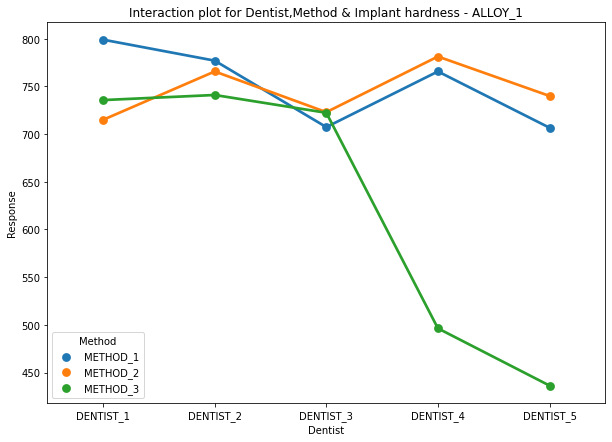

In [506]:
plt.figure(figsize=(10,7))
sns.pointplot(x='Dentist', y='Response', data=df_al_1, hue='Method',errorbar=None);
plt.title('Interaction plot for Dentist,Method & Implant hardness - ALLOY_1')


In [507]:
# Implant hardness is between 700 - 800 for all dentist considering the 3 methods,except dentist 4 & 5 while using method 3.
# For dentist_1 average implant harndess is not closely clustured .The plot shows that there is a significance with dentitst,method on implant harnedness for Alloy_1

In [508]:
#Interaction plot for alloy_2

Text(0.5, 1.0, 'Interaction plot for Dentist,Method & Implant hardness - ALLOY_2')

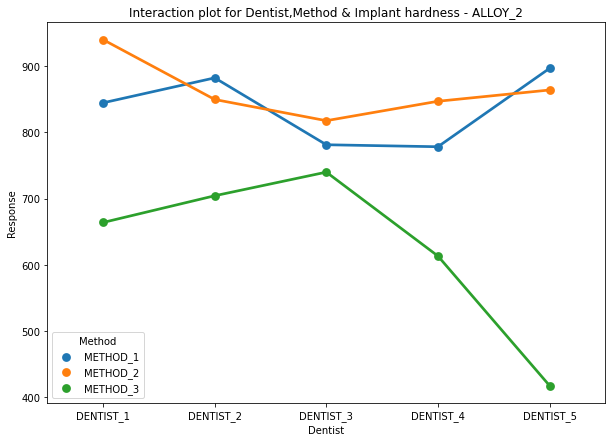

In [509]:
plt.figure(figsize=(10,7))
sns.pointplot(x='Dentist', y='Response', data=df_al_2, hue='Method',errorbar=None);
plt.title('Interaction plot for Dentist,Method & Implant hardness - ALLOY_2')

In [510]:
#The interaction plot shows that for all dentists method_3 shows lesser response value.For dentist_1,dentist_3 and dentist_4 method_2 seems have better response and for dentist _2 and dentist _5 method_1 have better response.

### 7.  Now consider the effect of both factors, dentist, and method, separately on each alloy. What do you conclude? Is it possible to identify which dentists are different, which methods are different, and which interaction levels are different?

In [511]:
#Interaction effect of dentist and method - ALLOY_1

In [512]:
formula = 'Response ~ Dentist * Method'
model = ols(formula, df_al_1).fit()
aov_table = anova_lm(model)
print(aov_table)

                  df         sum_sq       mean_sq          F    PR(>F)
Dentist          4.0  106683.688889  26670.922222   3.899638  0.011484
Method           2.0  148472.177778  74236.088889  10.854287  0.000284
Dentist:Method   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual        30.0  205180.000000   6839.333333        NaN       NaN


In [513]:
#Interaction effect of dentist and method - ALLOY_2

In [514]:
formula = 'Response ~ Dentist * Method'
model = ols(formula, df_al_2).fit()
aov_table = anova_lm(model)
print(aov_table)

                  df         sum_sq        mean_sq          F    PR(>F)
Dentist          4.0   56797.911111   14199.477778   1.106152  0.371833
Method           2.0  499640.400000  249820.200000  19.461218  0.000004
Dentist:Method   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual        30.0  385104.666667   12836.822222        NaN       NaN


In [515]:
compare = MultiComparison(df_al_1['Response'], df_al_1['Method'])
result = compare.tukeyhsd()
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower    upper   reject
------------------------------------------------------------
METHOD_1 METHOD_2   -6.1333  0.987  -102.714  90.4473  False
METHOD_1 METHOD_3    -124.8 0.0085 -221.3807 -28.2193   True
METHOD_2 METHOD_3 -118.6667 0.0128 -215.2473  -22.086   True
------------------------------------------------------------


In [516]:
compare = MultiComparison(df_al_2['Response'], df_al_2['Method'])
result = compare.tukeyhsd()
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2  meandiff p-adj    lower     upper   reject
------------------------------------------------------------
METHOD_1 METHOD_2     27.0 0.8212  -82.4546  136.4546  False
METHOD_1 METHOD_3   -208.8 0.0001 -318.2546  -99.3454   True
METHOD_2 METHOD_3   -235.8    0.0 -345.2546 -126.3454   True
------------------------------------------------------------


In [524]:
compare = MultiComparison(df_al_1['Response'], df_al_1['Dentist'])
result = compare.tukeyhsd()
print(result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower    upper   reject
--------------------------------------------------------------
DENTIST_1 DENTIST_2   11.3333 0.9996 -145.0423  167.709  False
DENTIST_1 DENTIST_3  -32.3333 0.9757  -188.709 124.0423  False
DENTIST_1 DENTIST_4  -68.7778 0.7189 -225.1535  87.5979  False
DENTIST_1 DENTIST_5 -122.2222 0.1889 -278.5979  34.1535  False
DENTIST_2 DENTIST_3  -43.6667 0.9298 -200.0423  112.709  False
DENTIST_2 DENTIST_4  -80.1111 0.5916 -236.4868  76.2646  False
DENTIST_2 DENTIST_5 -133.5556 0.1258 -289.9312  22.8201  False
DENTIST_3 DENTIST_4  -36.4444 0.9626 -192.8201 119.9312  False
DENTIST_3 DENTIST_5  -89.8889 0.4805 -246.2646  66.4868  False
DENTIST_4 DENTIST_5  -53.4444 0.8643 -209.8201 102.9312  False
--------------------------------------------------------------


In [525]:
compare = MultiComparison(df_al_2['Response'], df_al_2['Dentist'])
result = compare.tukeyhsd()
print(result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
DENTIST_1 DENTIST_2  -4.1111    1.0 -225.5687 217.3465  False
DENTIST_1 DENTIST_3 -36.5556 0.9895 -258.0131  184.902  False
DENTIST_1 DENTIST_4    -70.0 0.8941 -291.4576 151.4576  False
DENTIST_1 DENTIST_5 -90.1111 0.7724 -311.5687 131.3465  False
DENTIST_2 DENTIST_3 -32.4444 0.9933  -253.902 189.0131  False
DENTIST_2 DENTIST_4 -65.8889 0.9132 -287.3465 155.5687  False
DENTIST_2 DENTIST_5    -86.0 0.8008 -307.4576 135.4576  False
DENTIST_3 DENTIST_4 -33.4444 0.9925  -254.902 188.0131  False
DENTIST_3 DENTIST_5 -53.5556 0.9574 -275.0131  167.902  False
DENTIST_4 DENTIST_5 -20.1111  0.999 -241.5687 201.3465  False
-------------------------------------------------------------


# Problem 2: EDA

### Perform Exploratory Data Analysis [Univariate, Bivariate, and Multivariate analysis to be performed]. What insight do you draw from the EDA?

In [526]:
data_dict = pd.read_excel(r'C:\Users\User\Downloads\Data_Dictionary.xlsx')

In [527]:
data_dict

1)      Names: Names of various university and colleges
0       2)      Apps: Number of applications received     
1     3)      Accept: Number of applications accepted     
2     4)      Enroll: Number of new students enrolled     
3   5)      Top10perc: Percentage of new students ...     
4   6)      Top25perc: Percentage of new students ...     
5   7)      F.Undergrad: Number of full-time under...     
6   8)      P.Undergrad: Number of part-time under...     
7   9)      Outstate: Number of students for whom ...     
8            10)   Room.Board: Cost of Room and board     
9     11)   Books: Estimated book costs for a student     
10  12)   Personal: Estimated personal spending fo...     
11    13)   PhD: Percentage of faculties with Ph.D.’s     
12  14)   Terminal: Percentage of faculties with t...     
13             15)   S.F.Ratio: Student/faculty ratio     
14  16)   perc.alumni: Percentage of alumni who do...     
15  17)   Expend: The Instructional expenditure pe...     
16                   18)   Grad.Rate: Graduation rate

In [528]:
Ed = pd.read_csv(r'C:\Users\User\Downloads\Education_Post_12th_Standard.csv')

In [529]:
Ed.rename(columns= {'Top10perc':'Top_10_perc_HSC','Top25perc':'Top_25_perc_HSC','Names':'University','Apps':'Application received','Accept':'Application accepted','Enroll':'Students enrolled','F.Undergrad':'F_Undergrad','P.Undergrad':'P_Undergrad','Outstate':'Out of state tuition','Room.Board':'Cost of room and board','Books':'Estimated book cost','Personal':'Personal spending','PhD':'Fac_PhD','Terminal':'Fac_Terminal','S.F.Ratio':'Stu_Fac Ratio','perc.alumni':'Alumni_donation_perc','Expend':'Instructional expenditure','Grad.Rate':'Graduation rate'}, inplace=True)

In [530]:
Ed.head()

University  Application received  Application accepted  \
0  Abilene Christian University                  1660                  1232   
1            Adelphi University                  2186                  1924   
2                Adrian College                  1428                  1097   
3           Agnes Scott College                   417                   349   
4     Alaska Pacific University                   193                   146   

   Students enrolled  Top_10_perc_HSC  Top_25_perc_HSC  F_Undergrad  \
0                721               23               52         2885   
1                512               16               29         2683   
2                336               22               50         1036   
3                137               60               89          510   
4                 55               16               44          249   

   P_Undergrad  Out of state tuition  Cost of room and board  \
0          537                  7440                    3300   
1         1227                 12280                    6450   
2           99                 11250                    3750   
3           63                 12960                    5450   
4          869                  7560                    4120   

   Estimated book cost  Personal spending  Fac_PhD  Fac_Terminal  \
0                  450               2200       70            78   
1                  750               1500       29            30   
2                  400               1165       53            66   
3                  450                875       92            97   
4                  800               1500       76            72   

   Stu_Fac Ratio  Alumni_donation_perc  Instructional expenditure  \
0           18.1                    12                       7041   
1           12.2                    16                      10527   
2           12.9                    30                       8735   
3            7.7                    37                      19016   
4           11.9                     2                      10922   

   Graduation rate  
0               60  
1               56  
2               54  
3               59  
4               15

In [531]:
Ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   University                 777 non-null    object 
 1   Application received       777 non-null    int64  
 2   Application accepted       777 non-null    int64  
 3   Students enrolled          777 non-null    int64  
 4   Top_10_perc_HSC            777 non-null    int64  
 5   Top_25_perc_HSC            777 non-null    int64  
 6   F_Undergrad                777 non-null    int64  
 7   P_Undergrad                777 non-null    int64  
 8   Out of state tuition       777 non-null    int64  
 9   Cost of room and board     777 non-null    int64  
 10  Estimated book cost        777 non-null    int64  
 11  Personal spending          777 non-null    int64  
 12  Fac_PhD                    777 non-null    int64  
 13  Fac_Terminal               777 non-null    int64  

In [532]:
Ed.shape

(777, 18)

In [533]:
Ed.columns

Index(['University', 'Application received', 'Application accepted',
       'Students enrolled', 'Top_10_perc_HSC', 'Top_25_perc_HSC',
       'F_Undergrad', 'P_Undergrad', 'Out of state tuition',
       'Cost of room and board', 'Estimated book cost', 'Personal spending',
       'Fac_PhD', 'Fac_Terminal', 'Stu_Fac Ratio', 'Alumni_donation_perc',
       'Instructional expenditure', 'Graduation rate'],
      dtype='object')

In [534]:
Ed.isnull().sum()

University                   0
Application received         0
Application accepted         0
Students enrolled            0
Top_10_perc_HSC              0
Top_25_perc_HSC              0
F_Undergrad                  0
P_Undergrad                  0
Out of state tuition         0
Cost of room and board       0
Estimated book cost          0
Personal spending            0
Fac_PhD                      0
Fac_Terminal                 0
Stu_Fac Ratio                0
Alumni_donation_perc         0
Instructional expenditure    0
Graduation rate              0
dtype: int64

In [535]:
#There are no null values

In [536]:
Ed.describe(include='all').T

count unique                           top freq  \
University                   777    777  Abilene Christian University    1   
Application received       777.0    NaN                           NaN  NaN   
Application accepted       777.0    NaN                           NaN  NaN   
Students enrolled          777.0    NaN                           NaN  NaN   
Top_10_perc_HSC            777.0    NaN                           NaN  NaN   
Top_25_perc_HSC            777.0    NaN                           NaN  NaN   
F_Undergrad                777.0    NaN                           NaN  NaN   
P_Undergrad                777.0    NaN                           NaN  NaN   
Out of state tuition       777.0    NaN                           NaN  NaN   
Cost of room and board     777.0    NaN                           NaN  NaN   
Estimated book cost        777.0    NaN                           NaN  NaN   
Personal spending          777.0    NaN                           NaN  NaN   
Fac_PhD                    777.0    NaN                           NaN  NaN   
Fac_Terminal               777.0    NaN                           NaN  NaN   
Stu_Fac Ratio              777.0    NaN                           NaN  NaN   
Alumni_donation_perc       777.0    NaN                           NaN  NaN   
Instructional expenditure  777.0    NaN                           NaN  NaN   
Graduation rate            777.0    NaN                           NaN  NaN   

                                   mean          std     min     25%     50%  \
University                          NaN          NaN     NaN     NaN     NaN   
Application received        3001.638353  3870.201484    81.0   776.0  1558.0   
Application accepted        2018.804376  2451.113971    72.0   604.0  1110.0   
Students enrolled            779.972973    929.17619    35.0   242.0   434.0   
Top_10_perc_HSC               27.558559    17.640364     1.0    15.0    23.0   
Top_25_perc_HSC               55.796654    19.804778     9.0    41.0    54.0   
F_Undergrad                 3699.907336  4850.420531   139.0   992.0  1707.0   
P_Undergrad                  855.298584  1522.431887     1.0    95.0   353.0   
Out of state tuition       10440.669241  4023.016484  2340.0  7320.0  9990.0   
Cost of room and board      4357.526384  1096.696416  1780.0  3597.0  4200.0   
Estimated book cost          549.380952    165.10536    96.0   470.0   500.0   
Personal spending           1340.642214   677.071454   250.0   850.0  1200.0   
Fac_PhD                       72.660232    16.328155     8.0    62.0    75.0   
Fac_Terminal                  79.702703    14.722359    24.0    71.0    82.0   
Stu_Fac Ratio                 14.089704     3.958349     2.5    11.5    13.6   
Alumni_donation_perc          22.743887    12.391801     0.0    13.0    21.0   
Instructional expenditure   9660.171171   5221.76844  3186.0  6751.0  8377.0   
Graduation rate                65.46332     17.17771    10.0    53.0    65.0   

                               75%      max  
University                     NaN      NaN  
Application received        3624.0  48094.0  
Application accepted        2424.0  26330.0  
Students enrolled            902.0   6392.0  
Top_10_perc_HSC               35.0     96.0  
Top_25_perc_HSC               69.0    100.0  
F_Undergrad                 4005.0  31643.0  
P_Undergrad                  967.0  21836.0  
Out of state tuition       12925.0  21700.0  
Cost of room and board      5050.0   8124.0  
Estimated book cost          600.0   2340.0  
Personal spending           1700.0   6800.0  
Fac_PhD                       85.0    103.0  
Fac_Terminal                  92.0    100.0  
Stu_Fac Ratio                 16.5     39.8  
Alumni_donation_perc          31.0     64.0  
Instructional expenditure  10830.0  56233.0  
Graduation rate               78.0    118.0

In [537]:
Ed_num = Ed.select_dtypes(['float64','int64'])
Ed_cat = Ed.select_dtypes(['object']) 

In [538]:
Ed.columns

Index(['University', 'Application received', 'Application accepted',
       'Students enrolled', 'Top_10_perc_HSC', 'Top_25_perc_HSC',
       'F_Undergrad', 'P_Undergrad', 'Out of state tuition',
       'Cost of room and board', 'Estimated book cost', 'Personal spending',
       'Fac_PhD', 'Fac_Terminal', 'Stu_Fac Ratio', 'Alumni_donation_perc',
       'Instructional expenditure', 'Graduation rate'],
      dtype='object')

### Univariate analysis

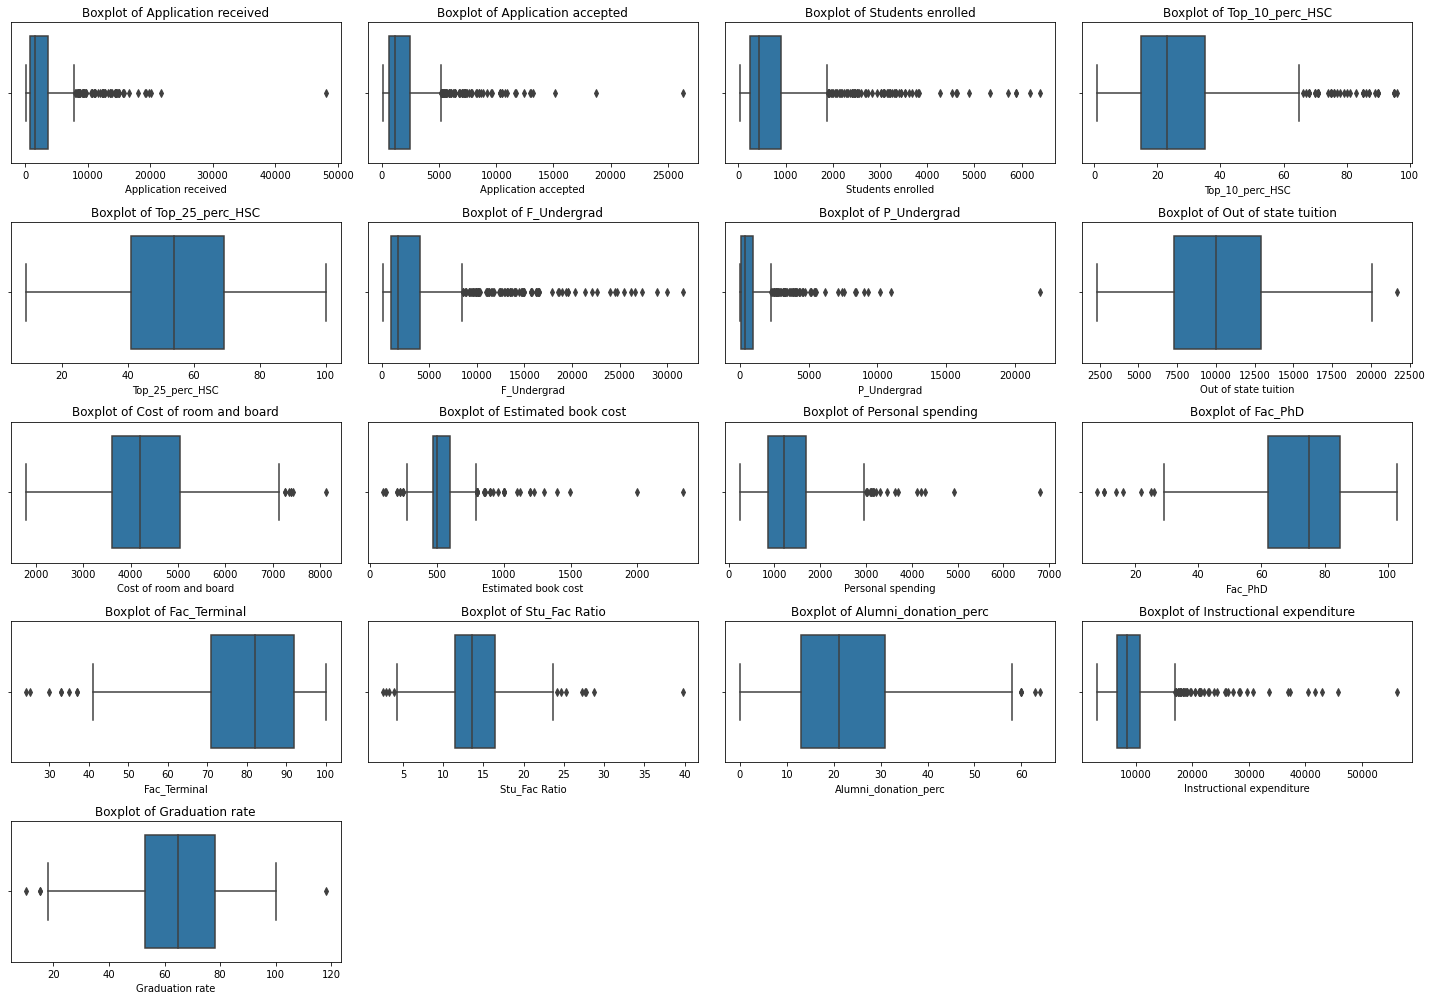

In [539]:
plt.figure(figsize = (20,14))
feature_list = Ed_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x = Ed_num[feature_list[i]], data = Ed)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

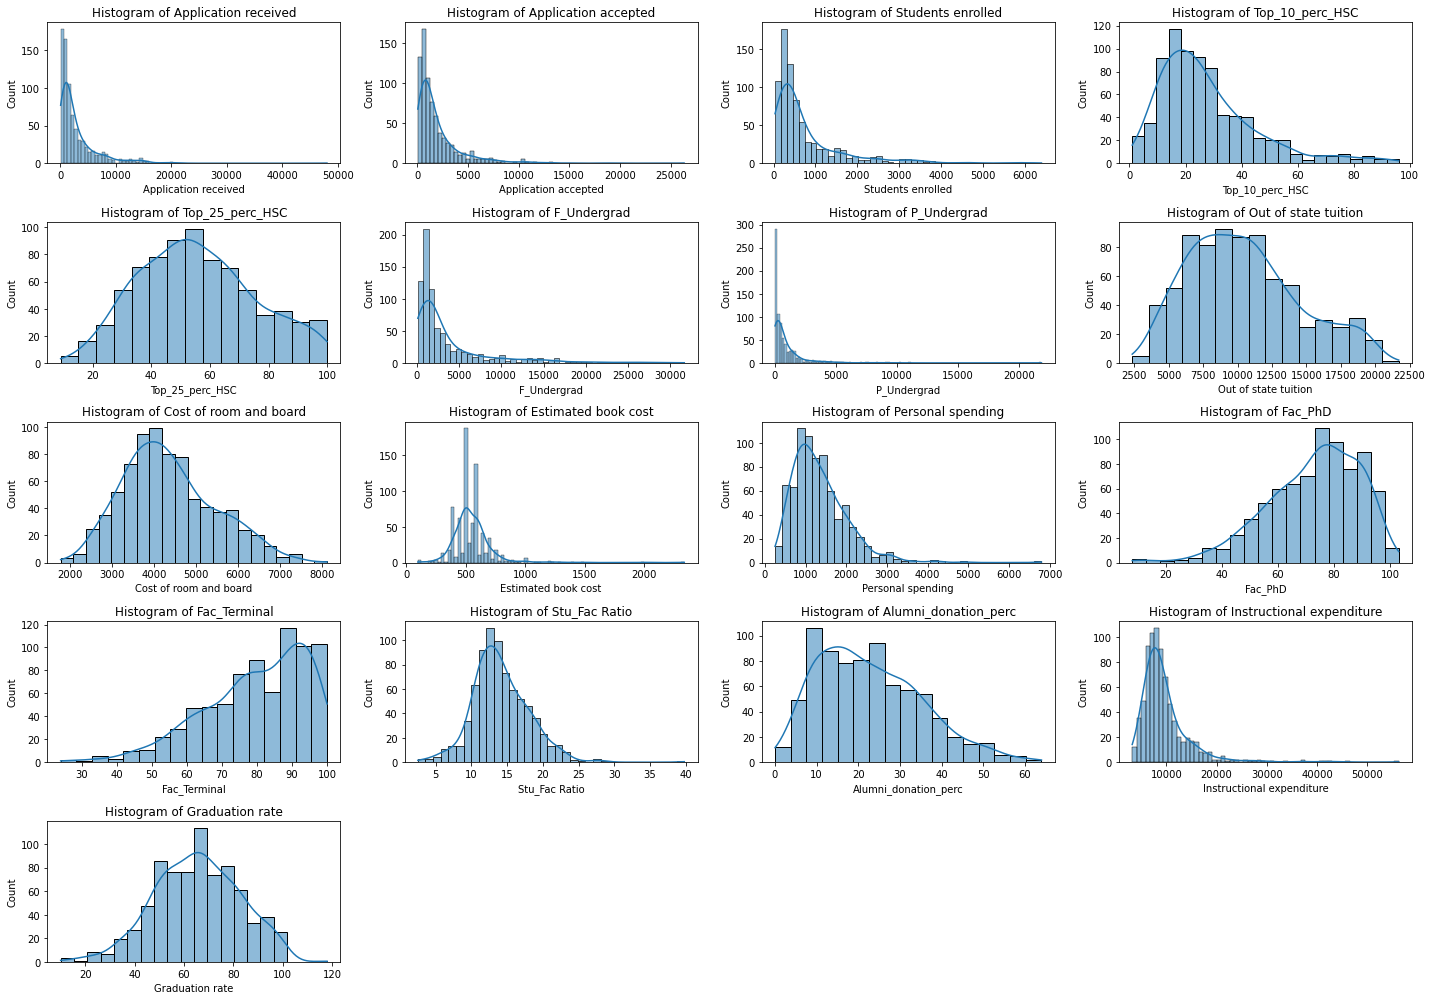

In [540]:
plt.figure(figsize = (20,14))
feature_list = Ed_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.histplot(x = Ed_num[feature_list[i]], data = Ed,kde=True)
    plt.title('Histogram of {}'.format(feature_list[i]))
    plt.tight_layout()

### Bivariate analysis

In [541]:
#listing top 10 college based on Apps,Accept and enroll

<AxesSubplot:xlabel='University'>

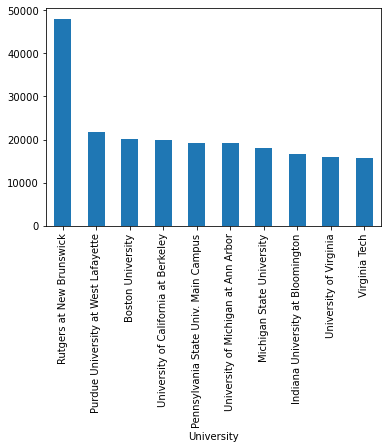

In [542]:
Ed.groupby('University')['Application received'].min().sort_values(ascending=False).head(10).plot(kind='bar')

In [543]:
Ed.groupby('University')['Application received'].min().sort_values(ascending=False).head(10)

University
Rutgers at New Brunswick                48094
Purdue University at West Lafayette     21804
Boston University                       20192
University of California at Berkeley    19873
Pennsylvania State Univ. Main Campus    19315
University of Michigan at Ann Arbor     19152
Michigan State University               18114
Indiana University at Bloomington       16587
University of Virginia                  15849
Virginia Tech                           15712
Name: Application received, dtype: int64

In [544]:
Ed.groupby('University')['Students enrolled'].min().sort_values(ascending=False).head(10)

University
Texas A&M Univ. at College Station     6392
Michigan State University              6180
Purdue University at West Lafayette    5874
Indiana University at Bloomington      5873
University of Illinois - Urbana        5705
University of Texas at Austin          5329
University of Michigan at Ann Arbor    4893
University of Wisconsin at Madison     4631
Brigham Young University at Provo      4615
Rutgers at New Brunswick               4520
Name: Students enrolled, dtype: int64

In [545]:
Ed.groupby('University')['Top_10_perc_HSC'].min().sort_values(ascending=False)

University
Massachusetts Institute of Technology    96
University of California at Berkeley     95
Harvey Mudd College                      95
Yale University                          95
Duke University                          90
                                         ..
Morris College                            2
Virginia State University                 2
North Adams State College                 1
Fayetteville State University             1
Center for Creative Studies               1
Name: Top_10_perc_HSC, Length: 777, dtype: int64

In [546]:
Ed.groupby('University')['P_Undergrad'].min().sort_values(ascending=False).head(10)

University
University of Minnesota Twin Cities     21836
University of South Florida             10962
Northeastern University                 10221
Florida International University         9310
Georgia State University                 9054
University of Texas at Arlington         8431
University of Utah                       8374
Arizona State University Main campus     7585
University of Wisconsin at Milwaukee     7443
University of Central Florida            7152
Name: P_Undergrad, dtype: int64

In [547]:
Ed.groupby('University')['Fac_Terminal'].min().sort_values(ascending=False).head(10)

University
Harvey Mudd College                         100
Bryn Mawr College                           100
New Mexico Institute of Mining and Tech.    100
University of Texas at San Antonio          100
Scripps College                             100
SUNY at Binghamton                          100
Pitzer College                              100
Niagara University                          100
Peru State College                          100
Albion College                              100
Name: Fac_Terminal, dtype: int64

In [548]:
Ed.groupby('University')['Stu_Fac Ratio'].min().sort_values(ascending=False).head(10)

University
Indiana Wesleyan University                39.8
Mesa State College                         28.8
Lesley College                             27.8
Goldey Beacom College                      27.6
Saint Joseph's College                     27.2
University of Texas at San Antonio         25.3
Western Michigan University                24.7
Lindenwood College                         24.1
Graceland College                          23.6
University of Sci. and Arts of Oklahoma    23.6
Name: Stu_Fac Ratio, dtype: float64

In [549]:
Ed.groupby('University')['Graduation rate'].min().sort_values(ascending=False).head(10)

University
Cazenovia College                  118
University of Richmond             100
Amherst College                    100
Grove City College                 100
Harvard University                 100
Harvey Mudd College                100
College of Mount St. Joseph        100
Lindenwood College                 100
Missouri Southern State College    100
Siena College                      100
Name: Graduation rate, dtype: int64

In [550]:
top_col = top_col.sort_values(by='Application received',ascending=False).head(10)

In [551]:
top_col

University  Application received
483              Rutgers at New Brunswick                 48094
461   Purdue University at West Lafayette                 21804
59                      Boston University                 20192
605  University of California at Berkeley                 19873
445  Pennsylvania State Univ. Main Campus                 19315
637   University of Michigan at Ann Arbor                 19152
366             Michigan State University                 18114
274     Indiana University at Bloomington                 16587
693                University of Virginia                 15849
713                         Virginia Tech                 15712

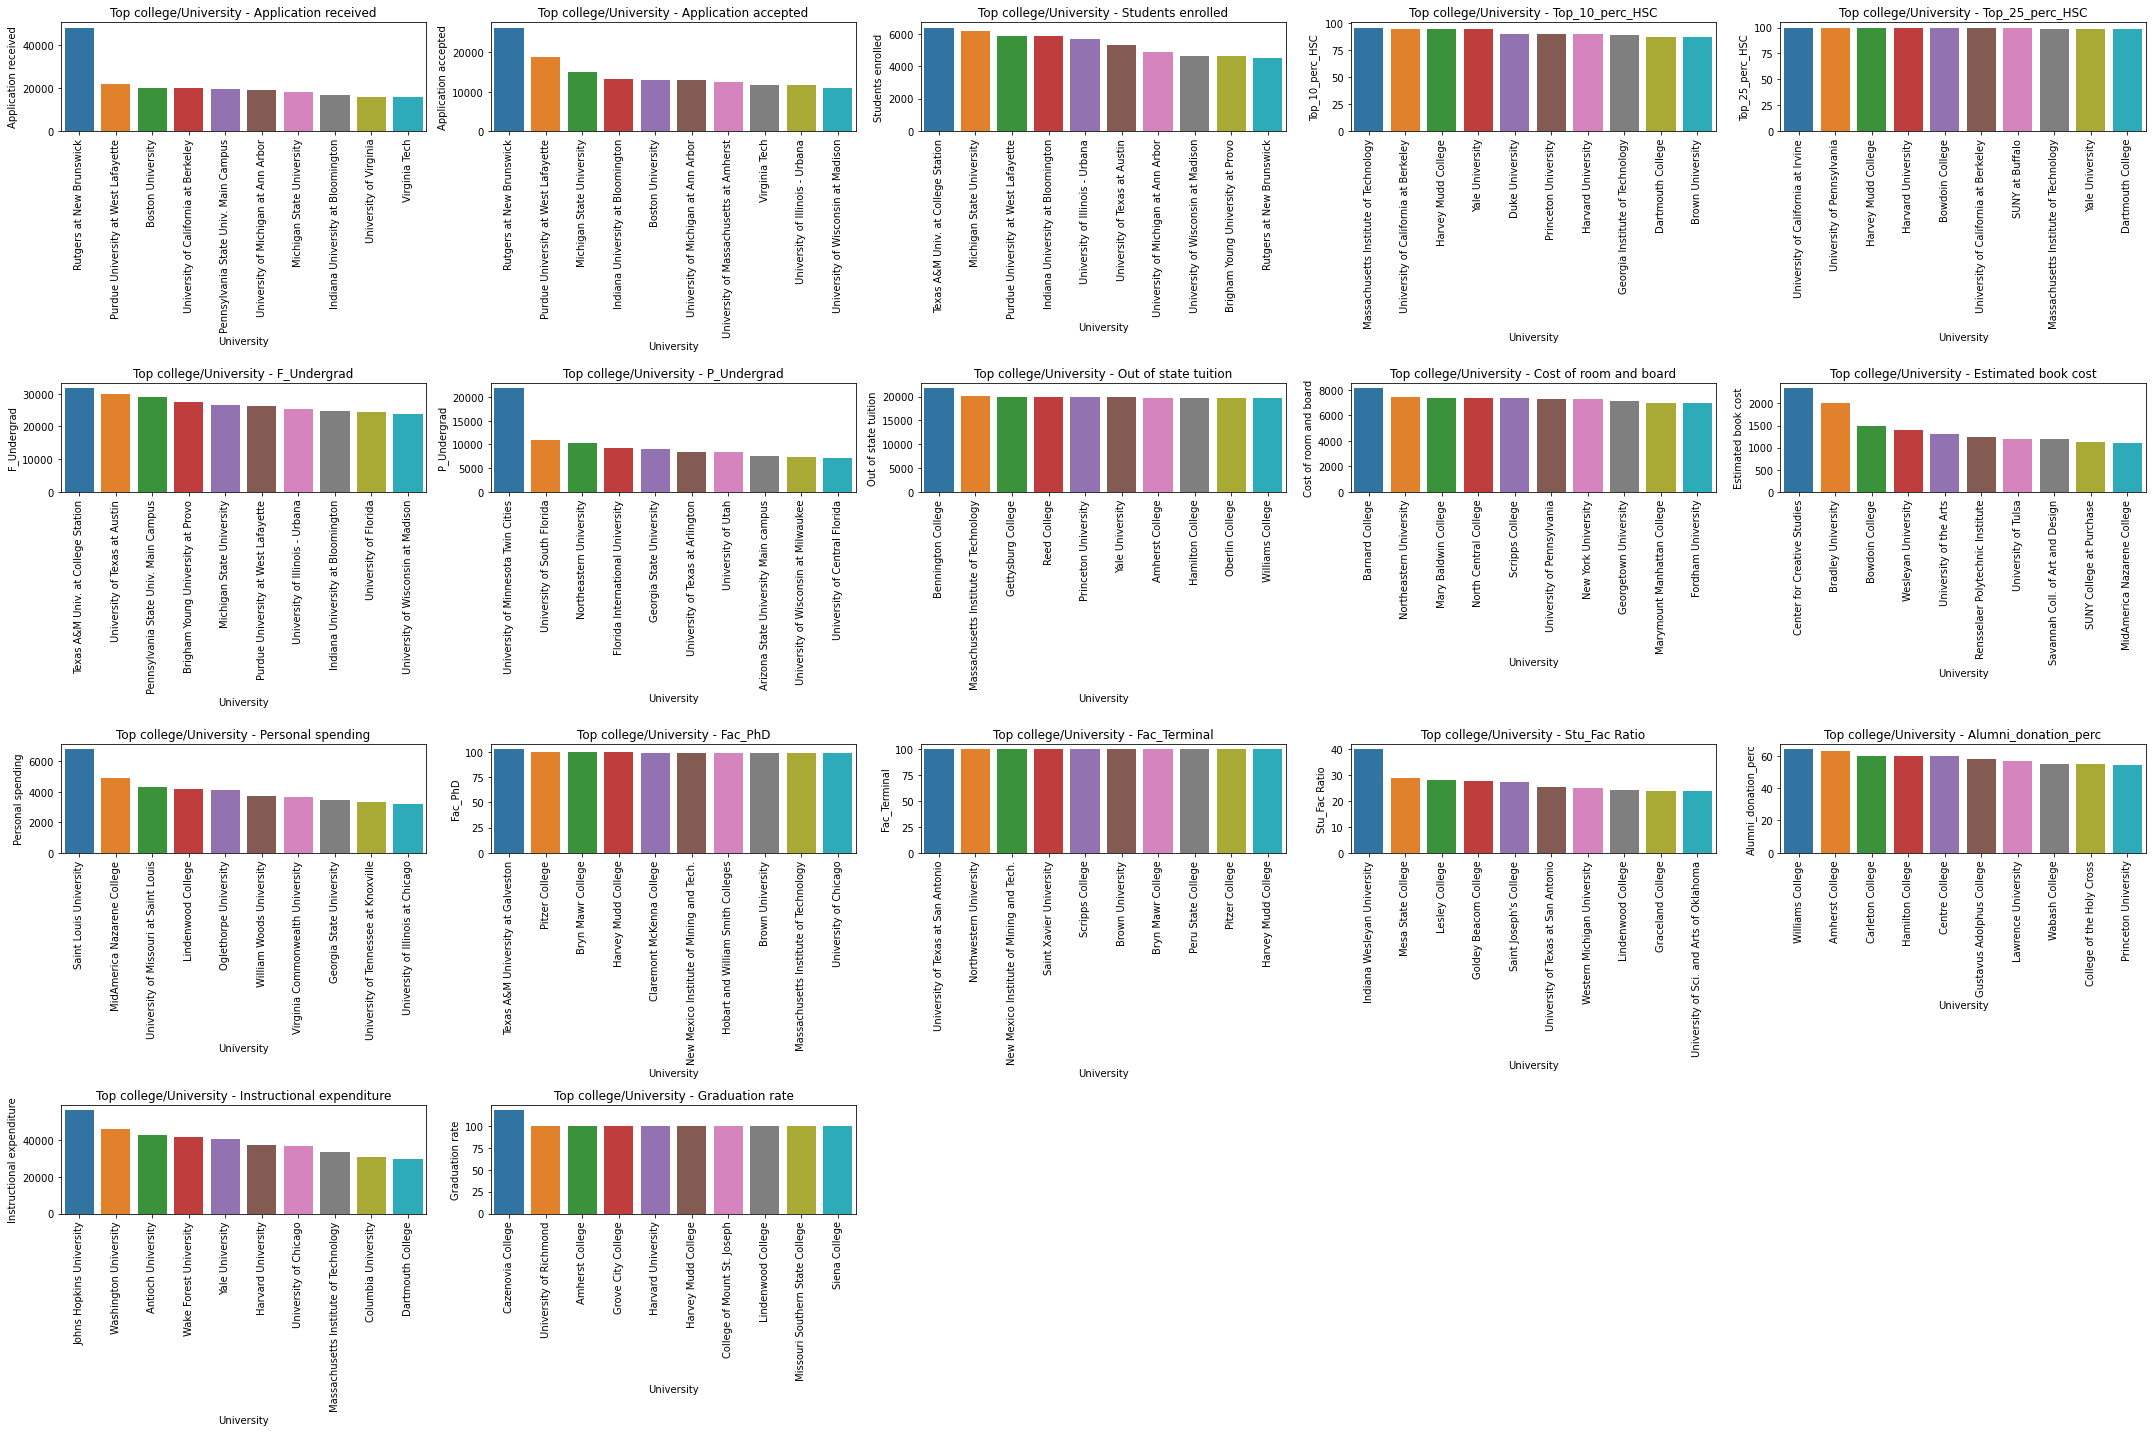

In [552]:
plt.figure(figsize = (30,20))
list = Ed_num.columns
for i in range(len(list)):
    plt.subplot(4 ,5 , i + 1)
    sns.barplot(x='University',y=Ed[list[i]],data = Ed.sort_values(by=list[i],ascending=False).head(10))
    plt.title('Top college/University - {}'.format(list[i]))
    plt.xticks(rotation=90)
    plt.tight_layout()

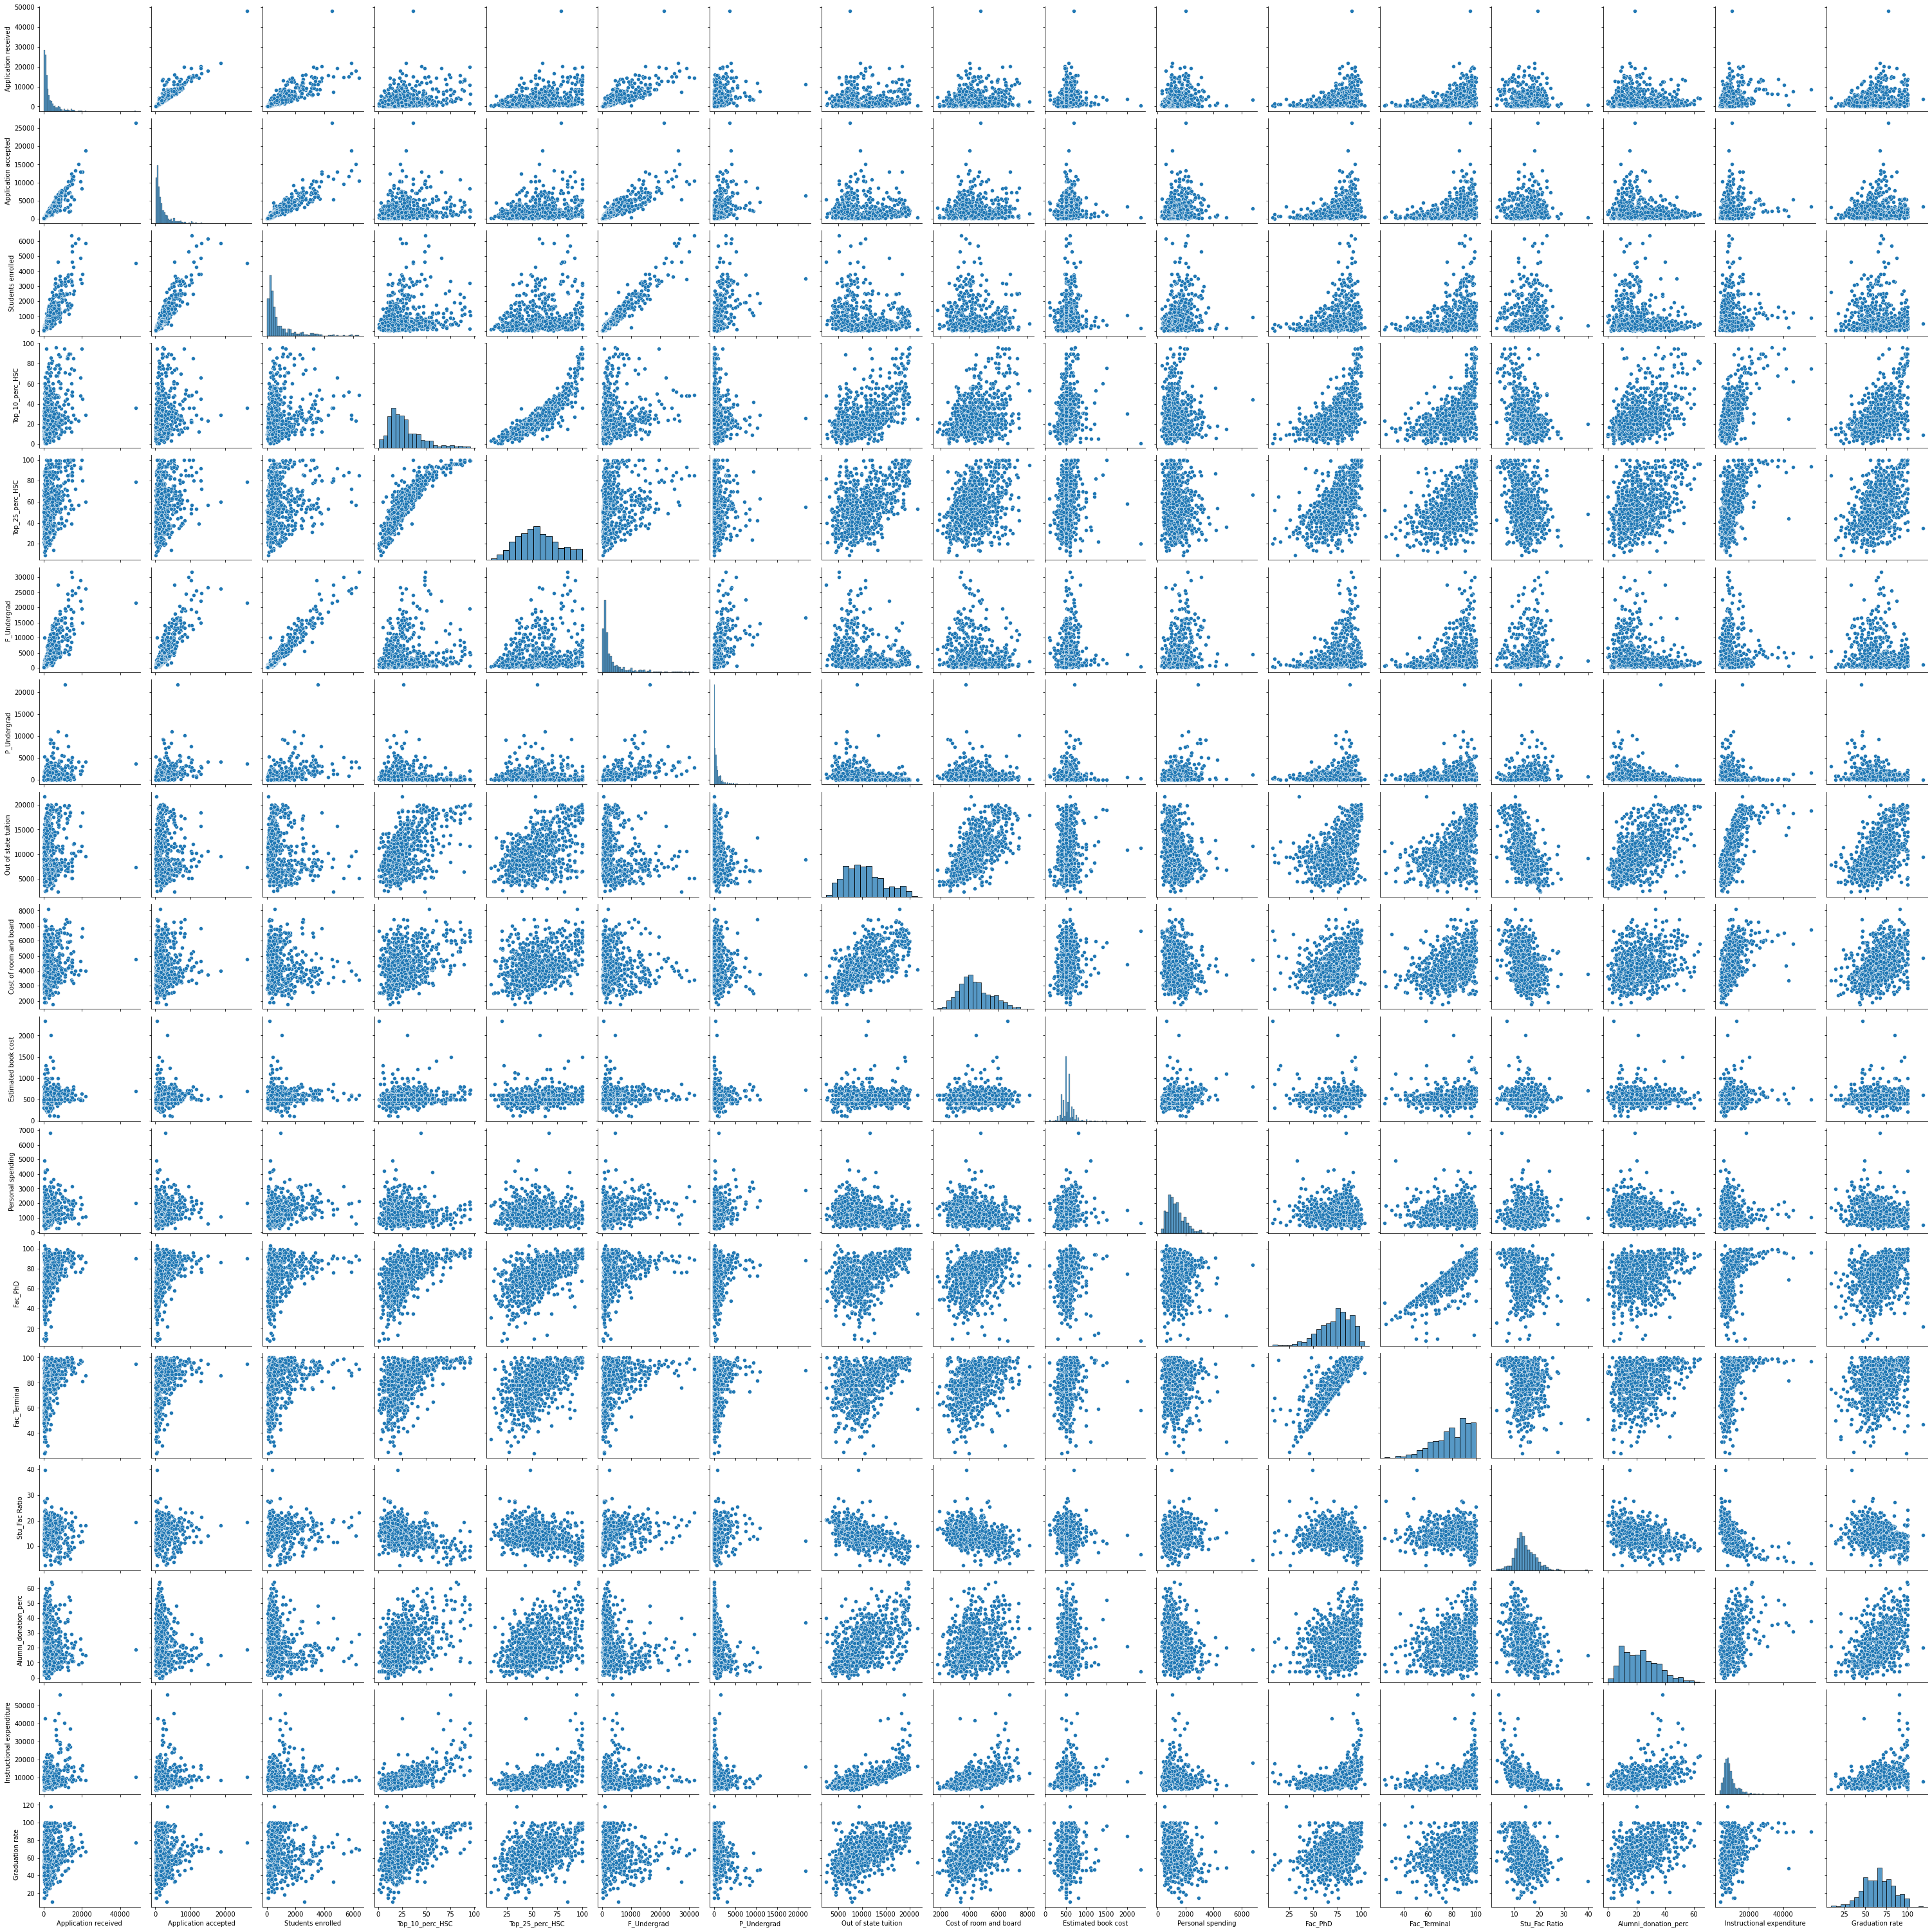

In [553]:
sns.pairplot(data=Ed)

In [554]:
Ed.corr()

Application received  Application accepted  \
Application received                   1.000000              0.943451   
Application accepted                   0.943451              1.000000   
Students enrolled                      0.846822              0.911637   
Top_10_perc_HSC                        0.338834              0.192447   
Top_25_perc_HSC                        0.351640              0.247476   
F_Undergrad                            0.814491              0.874223   
P_Undergrad                            0.398264              0.441271   
Out of state tuition                   0.050159             -0.025755   
Cost of room and board                 0.164939              0.090899   
Estimated book cost                    0.132559              0.113525   
Personal spending                      0.178731              0.200989   
Fac_PhD                                0.390697              0.355758   
Fac_Terminal                           0.369491              0.337583   
Stu_Fac Ratio                          0.095633              0.176229   
Alumni_donation_perc                  -0.090226             -0.159990   
Instructional expenditure              0.259592              0.124717   
Graduation rate                        0.146755              0.067313   

                           Students enrolled  Top_10_perc_HSC  \
Application received                0.846822         0.338834   
Application accepted                0.911637         0.192447   
Students enrolled                   1.000000         0.181294   
Top_10_perc_HSC                     0.181294         1.000000   
Top_25_perc_HSC                     0.226745         0.891995   
F_Undergrad                         0.964640         0.141289   
P_Undergrad                         0.513069        -0.105356   
Out of state tuition               -0.155477         0.562331   
Cost of room and board             -0.040232         0.371480   
Estimated book cost                 0.112711         0.118858   
Personal spending                   0.280929        -0.093316   
Fac_PhD                             0.331469         0.531828   
Fac_Terminal                        0.308274         0.491135   
Stu_Fac Ratio                       0.237271        -0.384875   
Alumni_donation_perc               -0.180794         0.455485   
Instructional expenditure           0.064169         0.660913   
Graduation rate                    -0.022341         0.494989   

                           Top_25_perc_HSC  F_Undergrad  P_Undergrad  \
Application received              0.351640     0.814491     0.398264   
Application accepted              0.247476     0.874223     0.441271   
Students enrolled                 0.226745     0.964640     0.513069   
Top_10_perc_HSC                   0.891995     0.141289    -0.105356   
Top_25_perc_HSC                   1.000000     0.199445    -0.053577   
F_Undergrad                       0.199445     1.000000     0.570512   
P_Undergrad                      -0.053577     0.570512     1.000000   
Out of state tuition              0.489394    -0.215742    -0.253512   
Cost of room and board            0.331490    -0.068890    -0.061326   
Estimated book cost               0.115527     0.115550     0.081200   
Personal spending                -0.080810     0.317200     0.319882   
Fac_PhD                           0.545862     0.318337     0.149114   
Fac_Terminal                      0.524749     0.300019     0.141904   
Stu_Fac Ratio                    -0.294629     0.279703     0.232531   
Alumni_donation_perc              0.417864    -0.229462    -0.280792   
Instructional expenditure         0.527447     0.018652    -0.083568   
Graduation rate                   0.477281    -0.078773    -0.257001   

                           Out of state tuition  Cost of room and board  \
Application received                   0.050159                0.164939   
Application accepted                  -0.025755                0.090899   
Students enrolled  

<AxesSubplot:>

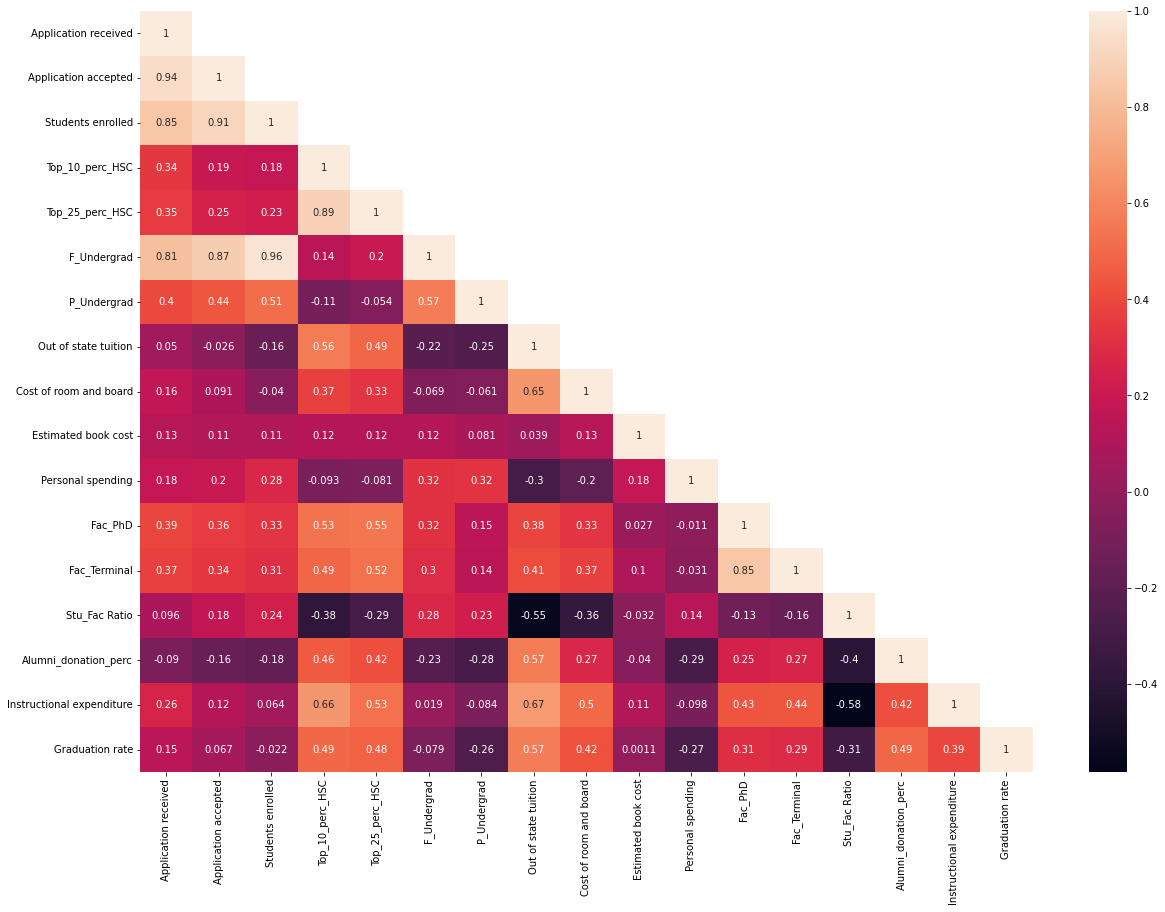

In [555]:
plt.figure(figsize=(20,14))
sns.heatmap(Ed.corr(),annot=True,mask=np.triu(Ed.corr(),1))

### Multi-variate analysis

Text(0.5, 1.0, 'Scatterplot of Application received,Application accepted & Students enrolled')

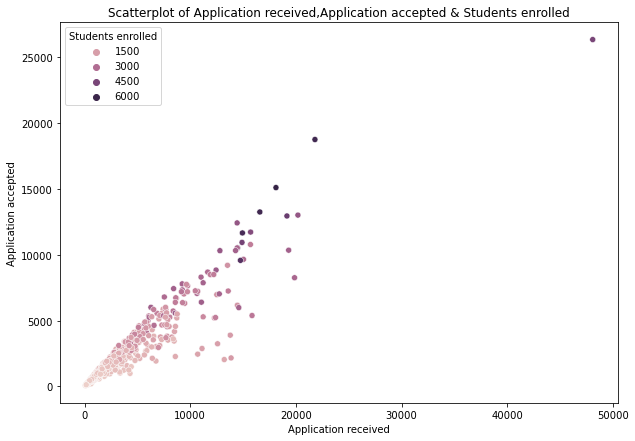

In [556]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = Ed,x='Application received',y='Application accepted',hue='Students enrolled')
plt.title('Scatterplot of Application received,Application accepted & Students enrolled')

In [557]:
Ed.columns

Index(['University', 'Application received', 'Application accepted',
       'Students enrolled', 'Top_10_perc_HSC', 'Top_25_perc_HSC',
       'F_Undergrad', 'P_Undergrad', 'Out of state tuition',
       'Cost of room and board', 'Estimated book cost', 'Personal spending',
       'Fac_PhD', 'Fac_Terminal', 'Stu_Fac Ratio', 'Alumni_donation_perc',
       'Instructional expenditure', 'Graduation rate'],
      dtype='object')

Text(0.5, 1.0, 'lmplot of Students enrolled & Full_time_Undergrad')

<Figure size 720x504 with 0 Axes>

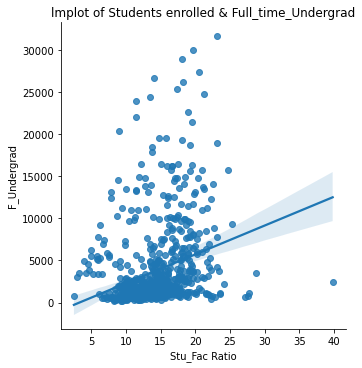

In [558]:
plt.figure(figsize=(10,7))
sns.lmplot(data = Ed,x='Stu_Fac Ratio',y='F_Undergrad')
plt.title('lmplot of Students enrolled & Full_time_Undergrad')

Text(0.5, 1.0, 'Scatterplot of Instructional expenditure & Students enrolled')

<Figure size 720x504 with 0 Axes>

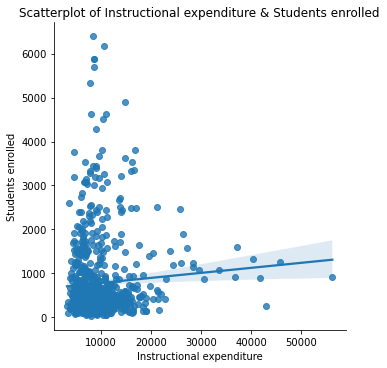

In [559]:
plt.figure(figsize=(10,7))
sns.lmplot(data = Ed,x='Instructional expenditure',y='Students enrolled')
plt.title('Scatterplot of Instructional expenditure & Students enrolled')

Text(0.5, 1.0, 'lmplot of Out of state tuition & Students enrolled')

<Figure size 720x504 with 0 Axes>

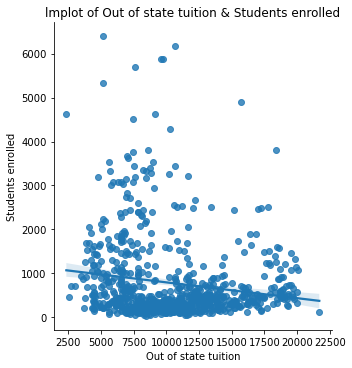

In [560]:
plt.figure(figsize=(10,7))
sns.lmplot(data = Ed,x='Out of state tuition',y='Students enrolled')
plt.title('lmplot of Out of state tuition & Students enrolled')

Text(0.5, 1.0, 'Scatterplot of Apps')

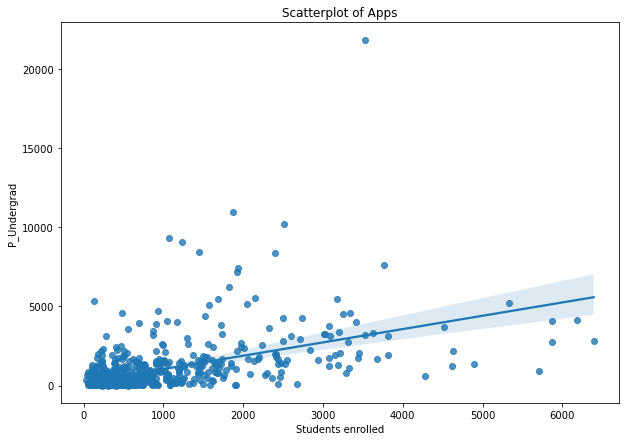

In [561]:
plt.figure(figsize=(10,7))
sns.regplot(data = Ed,x='Students enrolled',y='P_Undergrad')
plt.title('Scatterplot of Apps')

# PCA

### Problem-3

##### PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011

PCA for Female Headed Household Excluding Institutional Household

The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc.  The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990.  The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.

The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only. 

#### Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [562]:
census = pd.read_excel(r'C:\Users\User\Downloads\PCA_India Data_Census.xlsx')

In [565]:
census.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [566]:
#We will remove state code and dist code.

In [567]:
census_copy= census.copy()

In [568]:
census_copy.drop(['State Code','Dist.Code'],axis=1,inplace=True)

In [569]:
census_copy

State                Area Name  No_HH  TOT_M  TOT_F  \
0             Jammu & Kashmir                  Kupwara   7707  23388  29796   
1             Jammu & Kashmir                   Badgam   6218  19585  23102   
2             Jammu & Kashmir              Leh(Ladakh)   4452   6546  10964   
3             Jammu & Kashmir                   Kargil   1320   2784   4206   
4             Jammu & Kashmir                    Punch  11654  20591  29981   
..                        ...                      ...    ...    ...    ...   
635                Puducherry                     Mahe   3333   8154  11781   
636                Puducherry                 Karaikal  10612  12346  21691   
637  Andaman & Nicobar Island                 Nicobars   1275   1549   2630   
638  Andaman & Nicobar Island  North  & Middle Andaman   3762   5200   8012   
639  Andaman & Nicobar Island            South Andaman   7975  11977  18049   

     M_06  F_06  M_SC  F_SC  M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0    5862  6196     3     0  1999  ...           1150            749   
1    4482  3733     7     6   427  ...            525            715   
2    1082  1018     3     6  5806  ...            114            188   
3     563   677     0     0  2666  ...            194            247   
4    5157  4587    20    33  7670  ...            874           1928   
..    ...   ...   ...   ...   ...  ...            ...            ...   
635  1146  1203    21    30     0  ...             32             47   
636  1544  1533  2234  4155     0  ...            155            337   
637   227   225     0     0  1012  ...            104            134   
638   723   664     0     0    28  ...            136            172   
639  1470  1358     0     0   161  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0              180            237            680            252   
1              123            229            186            148   
2               44             89              3             34   
3               61            128             13             50   
4              465           1043            205            302   
..             ...            ...            ...            ...   
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0               32             46         258         214  
1               76            178         140         160  
2                0              4          67          61  
3                4             10         116          59  
4               24            105         180         478  
..             ...            ...         ...         ...  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[640 rows x 59 columns]

In [570]:
census_copy.shape

(640, 59)

In [571]:
#There are 640 rows and 61 columns in dataset

In [572]:
census_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           640 non-null    object
 1   Area Name       640 non-null    object
 2   No_HH           640 non-null    int64 
 3   TOT_M           640 non-null    int64 
 4   TOT_F           640 non-null    int64 
 5   M_06            640 non-null    int64 
 6   F_06            640 non-null    int64 
 7   M_SC            640 non-null    int64 
 8   F_SC            640 non-null    int64 
 9   M_ST            640 non-null    int64 
 10  F_ST            640 non-null    int64 
 11  M_LIT           640 non-null    int64 
 12  F_LIT           640 non-null    int64 
 13  M_ILL           640 non-null    int64 
 14  F_ILL           640 non-null    int64 
 15  TOT_WORK_M      640 non-null    int64 
 16  TOT_WORK_F      640 non-null    int64 
 17  MAINWORK_M      640 non-null    int64 
 18  MAINWORK_F

In [573]:
census.isnull().sum().value_counts()

0    61
dtype: int64

In [574]:
#No numm values are there

In [575]:
census.duplicated().sum()

0

In [576]:
#Duplicated rows are not present

In [577]:
census_copy.head()

State    Area Name  No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  \
0  Jammu & Kashmir      Kupwara   7707  23388  29796  5862  6196     3     0   
1  Jammu & Kashmir       Badgam   6218  19585  23102  4482  3733     7     6   
2  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964  1082  1018     3     6   
3  Jammu & Kashmir       Kargil   1320   2784   4206   563   677     0     0   
4  Jammu & Kashmir        Punch  11654  20591  29981  5157  4587    20    33   

   M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0  1999  ...           1150            749            180            237   
1   427  ...            525            715            123            229   
2  5806  ...            114            188             44             89   
3  2666  ...            194            247             61            128   
4  7670  ...            874           1928            465           1043   

   MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0            680            252             32             46         258   
1            186            148             76            178         140   
2              3             34              0              4          67   
3             13             50              4             10         116   
4            205            302             24            105         180   

   NON_WORK_F  
0         214  
1         160  
2          61  
3          59  
4         478  

[5 rows x 59 columns]

In [578]:
census_copy.describe(include='all').T

count unique            top freq           mean  \
State             640     35  Uttar Pradesh   71            NaN   
Area Name         640    635        Raigarh    2            NaN   
No_HH           640.0    NaN            NaN  NaN   51222.871875   
TOT_M           640.0    NaN            NaN  NaN   79940.576563   
TOT_F           640.0    NaN            NaN  NaN  122372.084375   
M_06            640.0    NaN            NaN  NaN   12309.098438   
F_06            640.0    NaN            NaN  NaN        11942.3   
M_SC            640.0    NaN            NaN  NaN   13820.946875   
F_SC            640.0    NaN            NaN  NaN   20778.392188   
M_ST            640.0    NaN            NaN  NaN    6191.807813   
F_ST            640.0    NaN            NaN  NaN   10155.640625   
M_LIT           640.0    NaN            NaN  NaN   57967.979688   
F_LIT           640.0    NaN            NaN  NaN   66359.565625   
M_ILL           640.0    NaN            NaN  NaN   21972.596875   
F_ILL           640.0    NaN            NaN  NaN    56012.51875   
TOT_WORK_M      640.0    NaN            NaN  NaN   37992.407813   
TOT_WORK_F      640.0    NaN            NaN  NaN   41295.760938   
MAINWORK_M      640.0    NaN            NaN  NaN   30204.446875   
MAINWORK_F      640.0    NaN            NaN  NaN   28198.846875   
MAIN_CL_M       640.0    NaN            NaN  NaN    5424.342188   
MAIN_CL_F       640.0    NaN            NaN  NaN    5486.042188   
MAIN_AL_M       640.0    NaN            NaN  NaN    5849.109375   
MAIN_AL_F       640.0    NaN            NaN  NaN    8925.995312   
MAIN_HH_M       640.0    NaN            NaN  NaN      883.89375   
MAIN_HH_F       640.0    NaN            NaN  NaN    1380.773438   
MAIN_OT_M       640.0    NaN            NaN  NaN   18047.101562   
MAIN_OT_F       640.0    NaN            NaN  NaN   12406.035938   
MARGWORK_M      640.0    NaN            NaN  NaN    7787.960938   
MARGWORK_F      640.0    NaN            NaN  NaN   13096.914062   
MARG_CL_M       640.0    NaN            NaN  NaN      1040.7375   
MARG_CL_F       640.0    NaN            NaN  NaN    2307.682813   
MARG_AL_M       640.0    NaN            NaN  NaN    3304.326562   
MARG_AL_F       640.0    NaN            NaN  NaN     6463.28125   
MARG_HH_M       640.0    NaN            NaN  NaN     316.742188   
MARG_HH_F       640.0    NaN            NaN  NaN     786.626562   
MARG_OT_M       640.0    NaN            NaN  NaN    3126.154687   
MARG_OT_F       640.0    NaN            NaN  NaN    3539.323438   
MARGWORK_3_6_M  640.0    NaN            NaN  NaN    41948.16875   
MARGWORK_3_6_F  640.0    NaN            NaN  NaN   81076.323438   
MARG_CL_3_6_M   640.0    NaN            NaN  NaN      6394.9875   
MARG_CL_3_6_F   640.0    NaN            NaN  NaN   10339.864063   
MARG_AL_3_6_M   640.0    NaN            NaN  NaN     789.848438   
MARG_AL_3_6_F   640.0    NaN            NaN  NaN    1749.584375   
MARG_HH_3_6_M   640.0    NaN            NaN  NaN    2743.635938   
MARG_HH_3_6_F   640.0    NaN            NaN  NaN        5169.85   
MARG_OT_3_6_M   640.0    NaN            NaN  NaN       245.3625   
MARG_OT_3_6_F   640.0    NaN            NaN  NaN     585.884375   
MARGWORK_0_3_M  640.0    NaN            NaN  NaN    2616.140625   
MARGWORK_0_3_F  640.0    NaN            NaN  NaN    2834.545312   
MARG_CL_0_3_M   640.0    NaN            NaN  NaN    1392.973438   
MARG_CL_0_3_F   640.0    NaN            NaN  NaN        2757.05   
MARG_AL_0_3_M   640.0    NaN            NaN  NaN     250.889062   
MARG_AL_0_3_F   640.0    NaN            NaN  NaN     558.098438   
MARG_HH_0_3_M   640.0    NaN            NaN  NaN     560.690625   
MARG_HH_0_3_F   640.0    NaN            NaN  NaN     1293.43125   
MARG_OT_0_3_M   640.0    NaN            NaN  NaN      71.379688   
MARG_OT_0_3_F   640.0    NaN            NaN  NaN     200.742188   
NON_WORK_M      640.0    NaN            NaN  NaN     510.014063   
NON_WORK_F      640.0    NaN            NaN  NaN     704.778125

#### Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 

### Univariate analysis

In [579]:
#Selected columns are :
# 1.Number of Household - No_HH
# 2.Total population Male - TOT_M
# 3.Total population Female - TOT_F
# 4.Literates population Male - M_LIT
# 5.Literates population Female - F_LIT

In [580]:
num = ['No_HH','TOT_M','TOT_F','M_LIT','F_LIT']

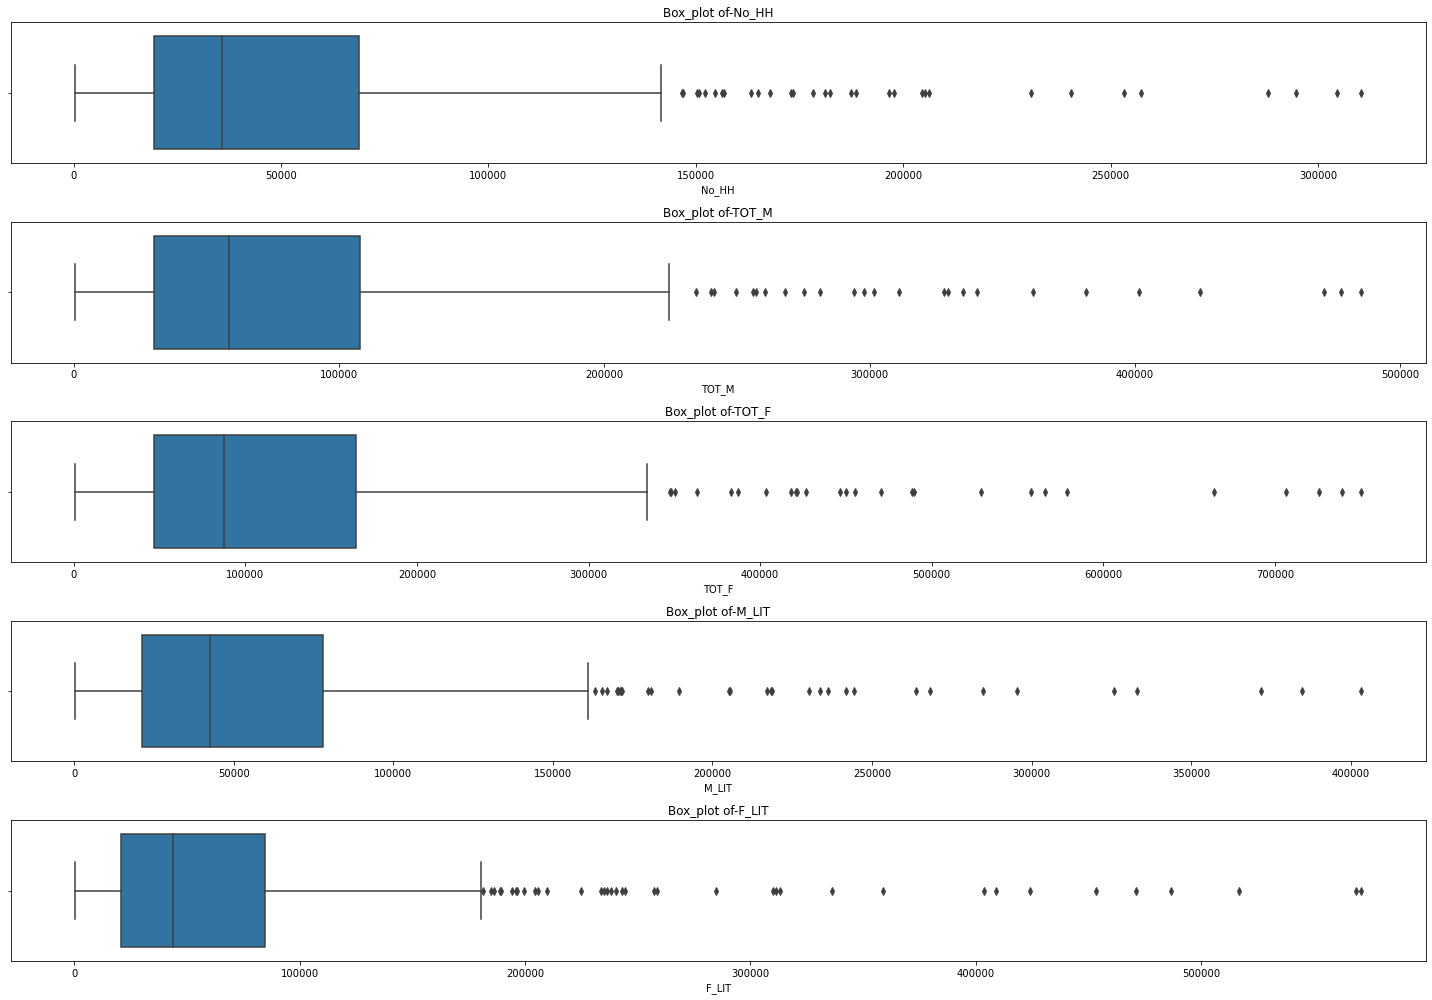

In [581]:
plt.figure(figsize=(20,14))
for i in range(len(num)):
    plt.subplot(5,1,i+1)
    sns.boxplot(data=census_copy,x= num[i])
    plt.title('Box_plot of-{}'.format(num[i]))
    plt.tight_layout()

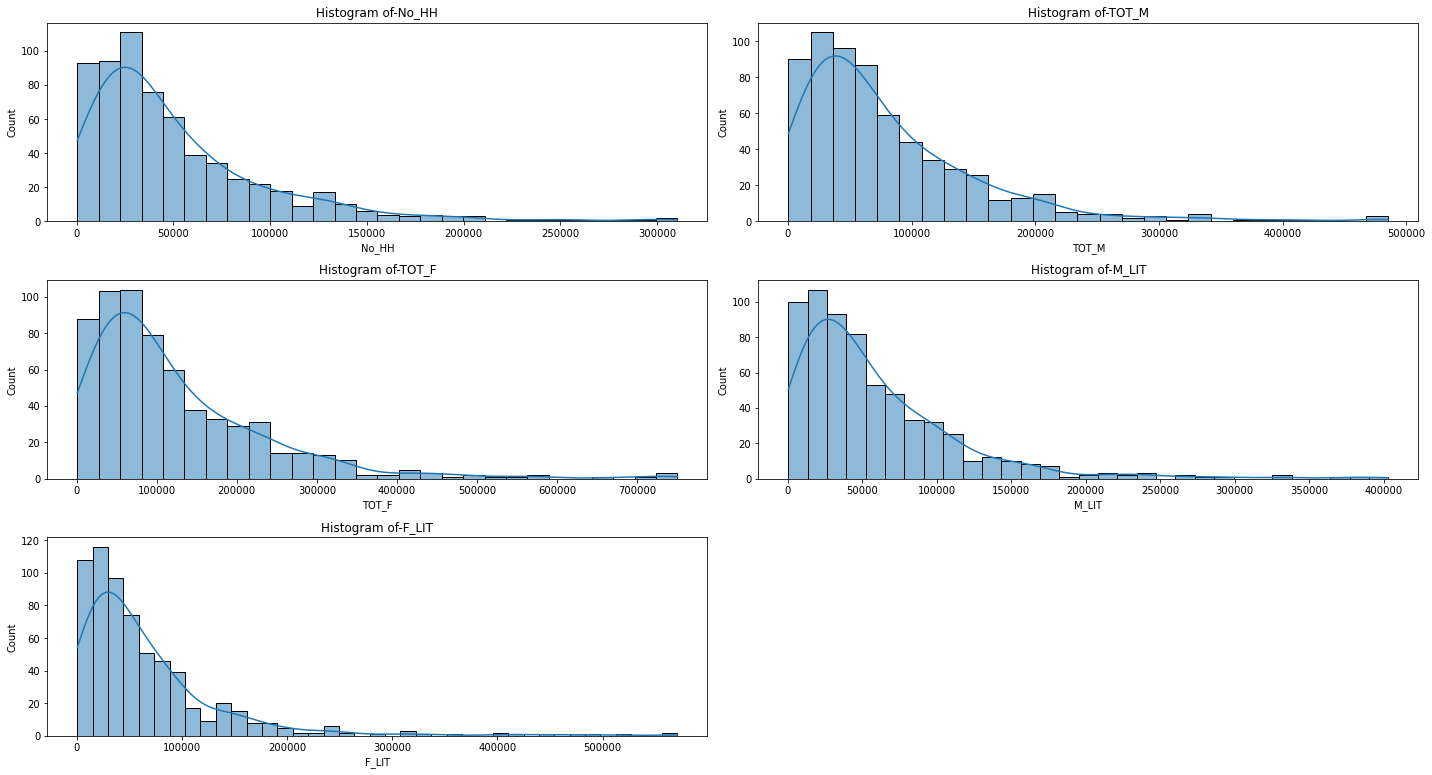

In [582]:
plt.figure(figsize=(20,14))
for i in range(len(num)):
    plt.subplot(4,2,i+1)
    sns.histplot(data=census_copy,x= num[i],kde=True)
    plt.title('Histogram of-{}'.format(num[i]))
    plt.tight_layout()

## Bivariate analysis

In [583]:
census_copy.groupby('State')['TOT_F'].mean().sort_values(ascending=False)

State
Kerala                      346882.642857
West Bengal                 316637.789474
Andhra Pradesh              265097.173913
Maharashtra                 203958.771429
Karnataka                   178189.166667
Tamil Nadu                  175322.187500
Uttar Pradesh               169350.492958
Bihar                       142260.078947
NCT of Delhi                119474.000000
Gujarat                     113056.615385
Punjab                      106071.250000
Goa                          95696.500000
Rajasthan                    89893.818182
Chhattisgarh                 84810.666667
Odisha                       84566.000000
Assam                        77534.518519
Uttarakhand                  74857.461538
Jharkhand                    73495.166667
Haryana                      71374.904762
Madhya Pradesh               67394.900000
Tripura                      64092.500000
Himachal Pradesh             62671.833333
Chandigarh                   59644.000000
Meghalaya                   

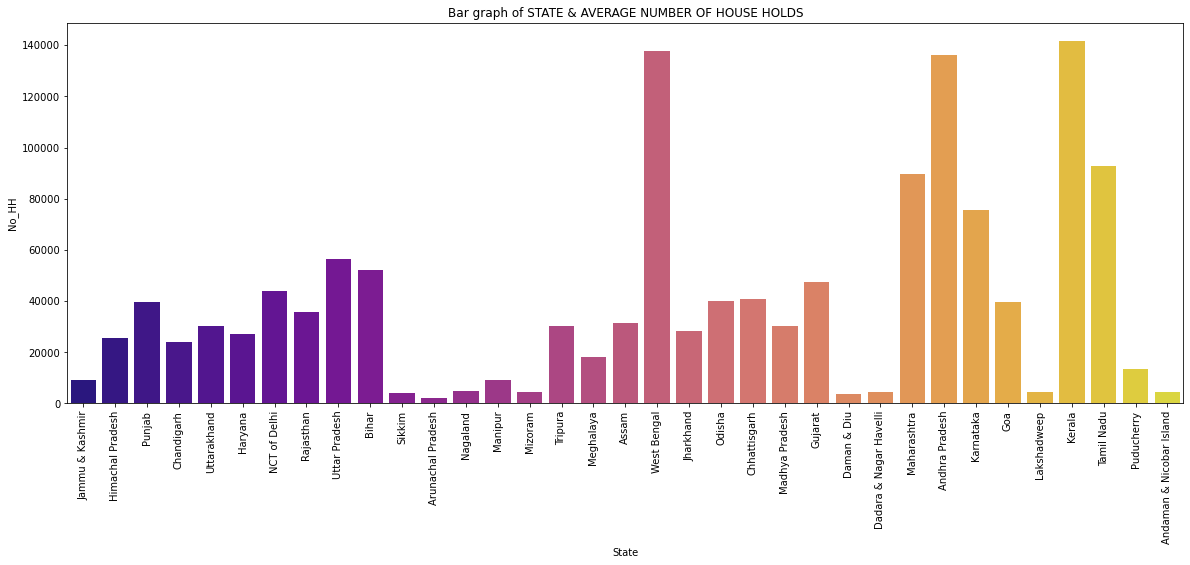

In [584]:
plt.figure(figsize=(20,7))
sns.barplot(data=census_copy,x= 'State',y='No_HH',errorbar=None,palette='plasma')
plt.title('Bar graph of STATE & AVERAGE NUMBER OF HOUSE HOLDS')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'TOTAL NUMBER OF HOUSE HOLDS STATE WISE')

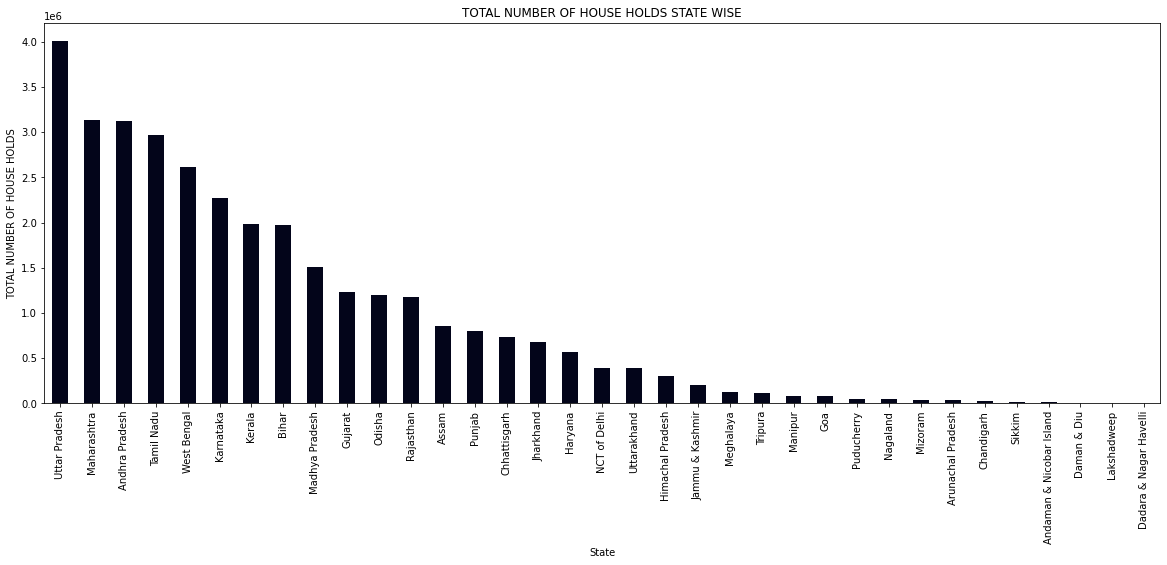

In [585]:
census_copy.groupby('State')['No_HH'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,7),colormap='rocket')
plt.ylabel('TOTAL NUMBER OF HOUSE HOLDS')
plt.title('TOTAL NUMBER OF HOUSE HOLDS STATE WISE')

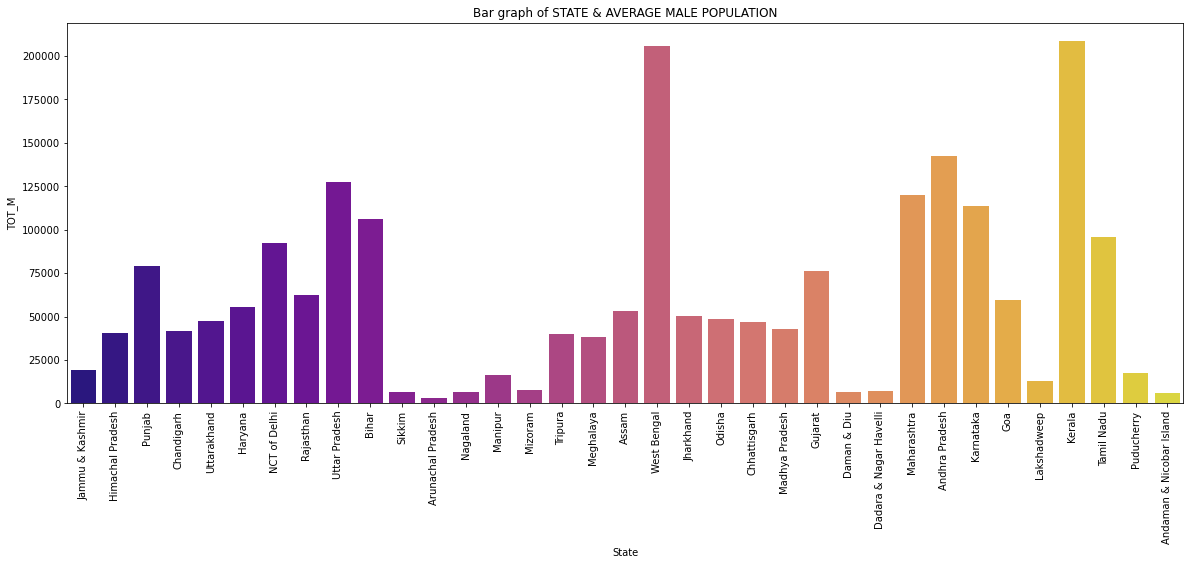

In [586]:
plt.figure(figsize=(20,7))
sns.barplot(data=census_copy,x= 'State',y='TOT_M',errorbar=None,palette='plasma')
plt.title('Bar graph of STATE & AVERAGE MALE POPULATION')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'TOTAL MALE POPULATION STATE WISE')

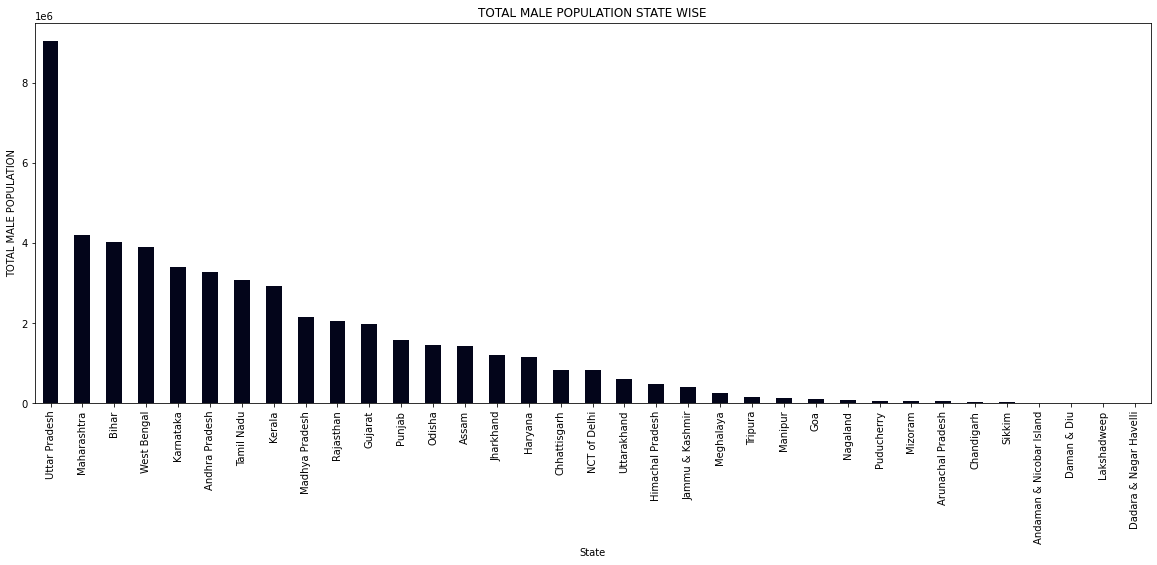

In [587]:
census_copy.groupby('State')['TOT_M'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,7),colormap='rocket')
plt.ylabel('TOTAL MALE POPULATION')
plt.title('TOTAL MALE POPULATION STATE WISE')

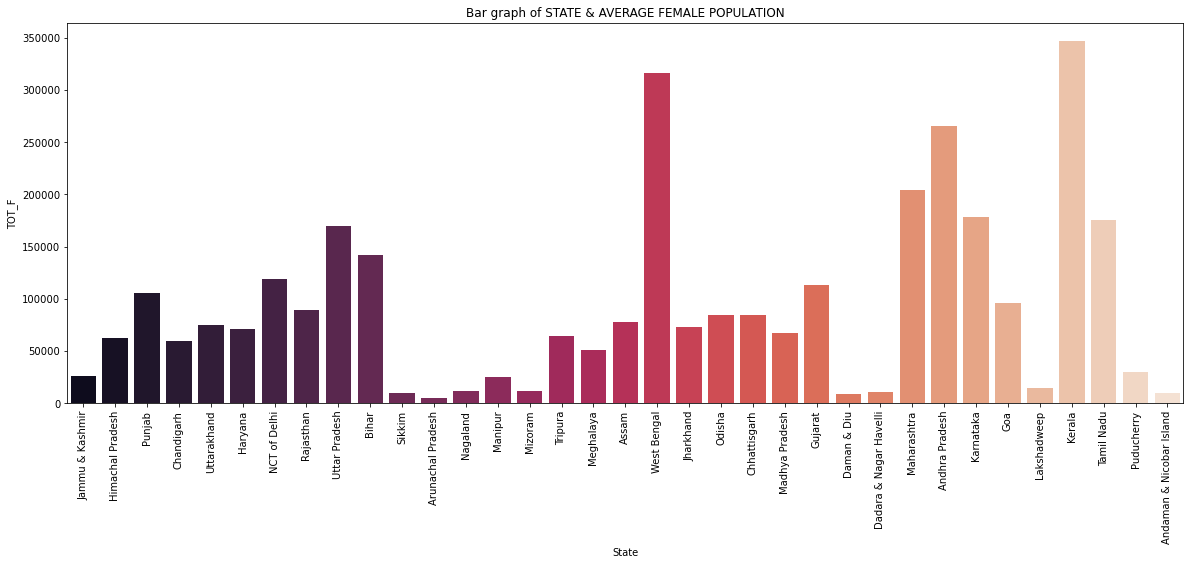

In [588]:
plt.figure(figsize=(20,7))
sns.barplot(data=census_copy,x= 'State',y='TOT_F',errorbar=None,palette='rocket')
plt.title('Bar graph of STATE & AVERAGE FEMALE POPULATION')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'TOTAL FEMALE POPULATION STATE WISE')

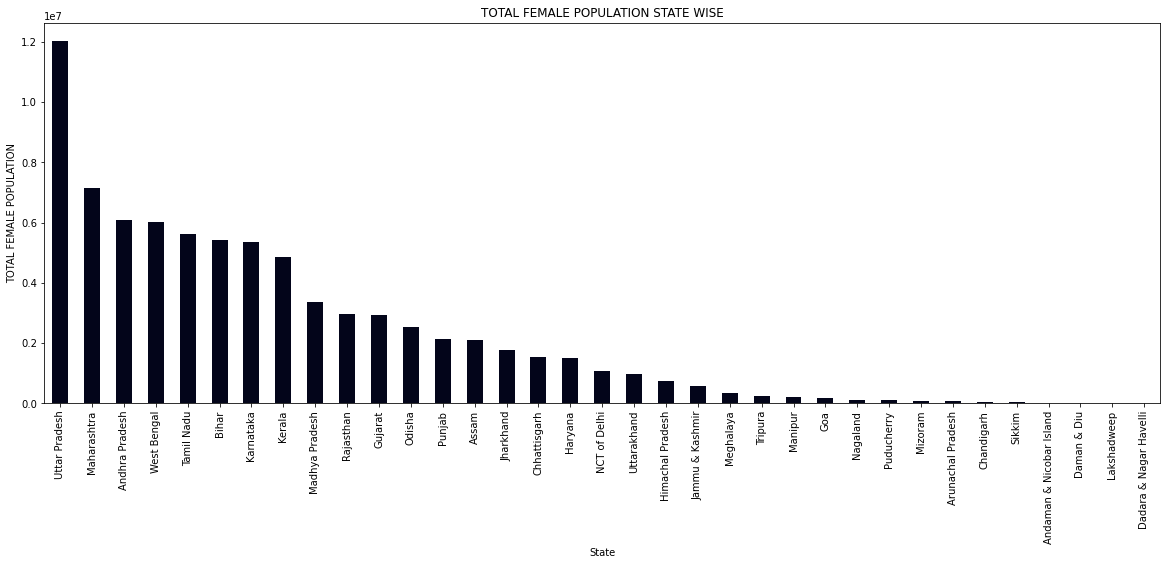

In [589]:
census_copy.groupby('State')['TOT_F'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,7),colormap='rocket')
plt.ylabel('TOTAL FEMALE POPULATION')
plt.title('TOTAL FEMALE POPULATION STATE WISE')

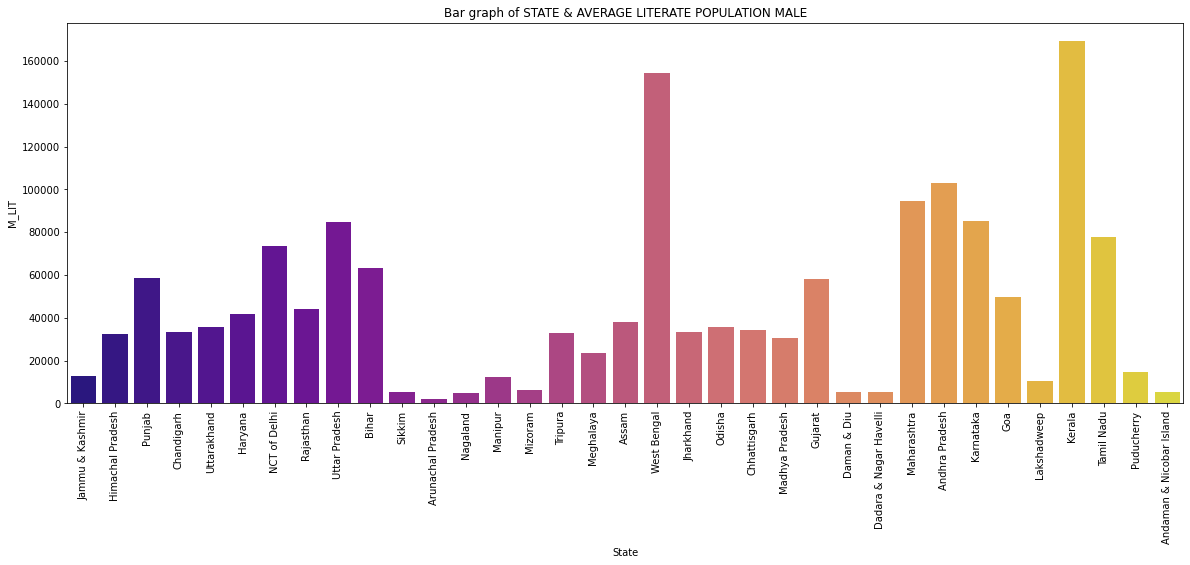

In [590]:
plt.figure(figsize=(20,7))
sns.barplot(data=census_copy,x= 'State',y='M_LIT',errorbar=None,palette='plasma')
plt.title('Bar graph of STATE & AVERAGE LITERATE POPULATION MALE')
plt.xticks(rotation=90)
plt.show()

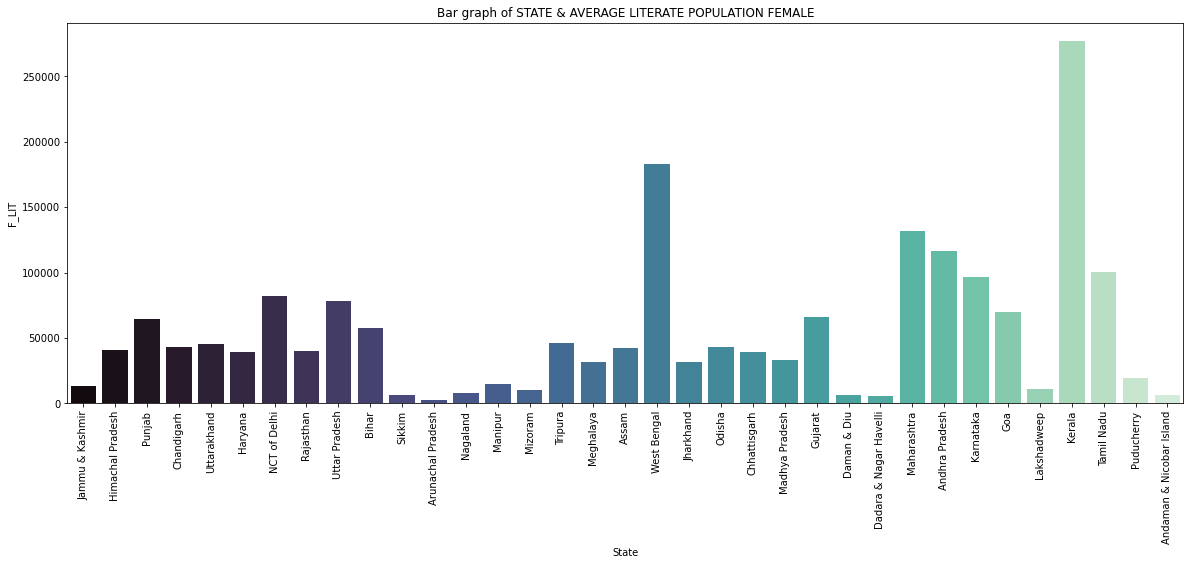

In [591]:
plt.figure(figsize=(20,7))
sns.barplot(data=census,x= 'State',y='F_LIT',errorbar=None,palette='mako')
plt.title('Bar graph of STATE & AVERAGE LITERATE POPULATION FEMALE')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='M_LIT', ylabel='F_LIT'>

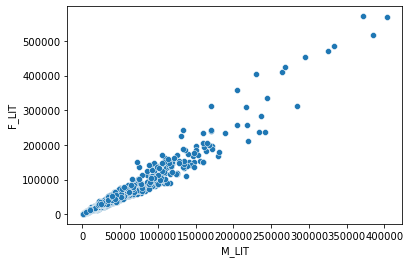

In [592]:
sns.scatterplot(data=census_copy,x='M_LIT',y='F_LIT')

<AxesSubplot:xlabel='TOT_M', ylabel='TOT_F'>

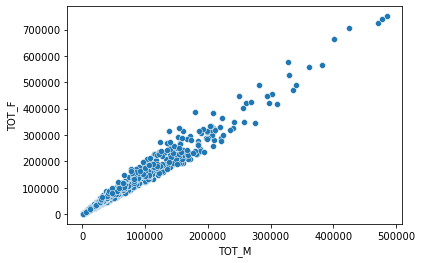

In [593]:
sns.scatterplot(data=census_copy,x='TOT_M',y='TOT_F')

<AxesSubplot:xlabel='TOT_M', ylabel='M_LIT'>

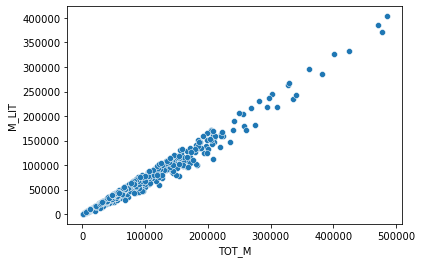

In [594]:
sns.scatterplot(data=census_copy,x='TOT_M',y='M_LIT')

<AxesSubplot:xlabel='TOT_F', ylabel='F_LIT'>

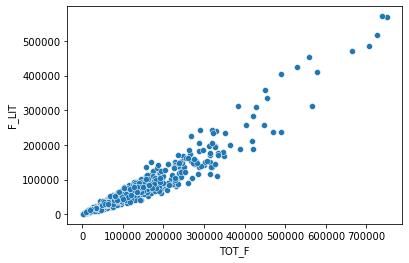

In [595]:
sns.scatterplot(data=census_copy,x='TOT_F',y='F_LIT')

In [596]:
census_copy[num].corr()

No_HH     TOT_M     TOT_F     M_LIT     F_LIT
No_HH  1.000000  0.916170  0.970590  0.931938  0.928087
TOT_M  0.916170  1.000000  0.982640  0.989312  0.931708
TOT_F  0.970590  0.982640  1.000000  0.985441  0.957012
M_LIT  0.931938  0.989312  0.985441  1.000000  0.967956
F_LIT  0.928087  0.931708  0.957012  0.967956  1.000000

<AxesSubplot:>

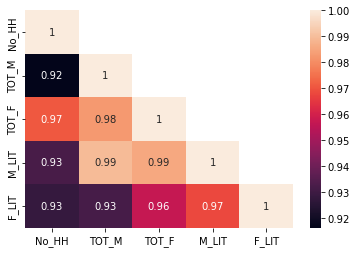

In [597]:
sns.heatmap(census_copy[num].corr(),annot=True,mask=np.triu(census_copy[num].corr(),1))

#### We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary? 

In [598]:
# We don't have to treat oultliers here.The data provided is the census.Here there are no abnormal observations as these are population data

#### Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment. 

In [599]:
census_copy.columns

Index(['State', 'Area Name', 'No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC',
       'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL',
       'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M',
       'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F',
       'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M',
       'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F',
       'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F',
       'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F',
       'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F',
       'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F',
       'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F',
       'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [600]:
#Drp unwanted columns

In [601]:
census_copy.drop(['State','Area Name'],axis=1,inplace=True)

In [602]:
#Scaling data.

In [603]:
census_scaled=census_copy.apply(stats.zscore)

In [604]:
census_scaled

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0   -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1   -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2   -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3   -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4   -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   
..        ...       ...       ...       ...       ...       ...       ...   
635 -0.995677 -0.978990 -0.974268 -0.971387 -0.948916 -0.957326 -0.955667   
636 -0.844340 -0.921822 -0.886965 -0.936754 -0.919757 -0.803806 -0.765670   
637 -1.038465 -1.069066 -1.054885 -1.051356 -1.035331 -0.958783 -0.957049   
638 -0.986758 -1.019276 -1.007472 -1.008195 -0.996541 -0.958783 -0.957049   
639 -0.899166 -0.926854 -0.919050 -0.943193 -0.935220 -0.958783 -0.957049   

         M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0   -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1   -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2   -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3   -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4    0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   
..        ...       ...       ...  ...            ...            ...   
635 -0.625124 -0.640197 -0.913820  ...      -0.914299      -0.972530   
636 -0.625124 -0.640197 -0.853390  ...      -0.831668      -0.868461   
637 -0.522953 -0.529880 -1.016367  ...      -0.865930      -0.941309   
638 -0.622297 -0.637046 -0.962328  ...      -0.844432      -0.927673   
639 -0.608870 -0.623555 -0.856916  ...      -0.819576      -0.945616   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0        -0.156494      -0.287524       0.156577      -0.657412   
1        -0.282327      -0.294688      -0.491731      -0.723062   
2        -0.456727      -0.420050      -0.731894      -0.795026   
3        -0.419198      -0.385127      -0.718770      -0.784926   
4         0.472670       0.434200      -0.466796      -0.625849   
..             ...            ...            ...            ...   
635      -0.553861      -0.499744      -0.735831      -0.816489   
636      -0.547238      -0.487208      -0.685961      -0.734425   
637      -0.533992      -0.496162      -0.733206      -0.812701   
638      -0.500878      -0.460344      -0.721395      -0.803232   
639      -0.540615      -0.497953      -0.713521      -0.805757   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0        -0.365258      -0.499977   -0.413053   -0.539614  
1         0.042855      -0.073481   -0.606455   -0.598988  
2        -0.662068      -0.635680   -0.726103   -0.707839  
3        -0.624966      -0.616294   -0.645791   -0.710038  
4        -0.439461      -0.309346   -0.540895   -0.249344  
..             ...            ...         ...         ...  
635      -0.662068      -0.648604   -0.783468   -0.723232  
636      -0.624966      -0.574290   -0.655625   -0.587993  
637      -0.504388      -0.496746   -0.711352   -0.690247  
638      -0.652792      -0.635680   -0.672015   -0.661660  
639      -0.643517      -0.635680   -0.593343   -0.666058  

[640 rows x 57 columns]

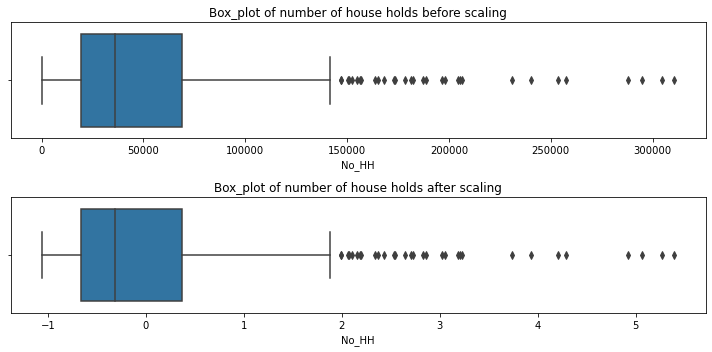

In [605]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.boxplot(data=census_copy,x= 'No_HH')
plt.title('Box_plot of number of house holds before scaling')
plt.subplot(2,1,2)
sns.boxplot(data=census_scaled,x= 'No_HH')
plt.title('Box_plot of number of house holds after scaling')
plt.tight_layout()

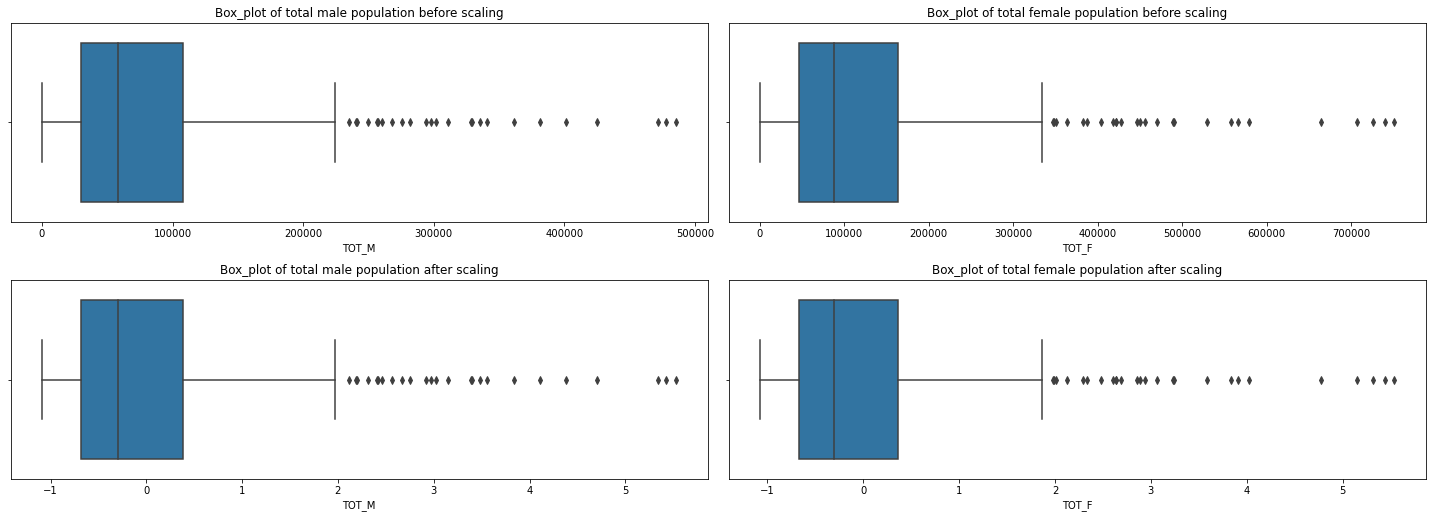

In [606]:
plt.figure(figsize=(20,14))
plt.subplot(4,2,1)
sns.boxplot(data=census_copy,x= 'TOT_M')
plt.title('Box_plot of total male population before scaling')
plt.subplot(4,2,3)
sns.boxplot(data=census_scaled,x= 'TOT_M')
plt.title('Box_plot of total male population after scaling')
plt.tight_layout()
plt.subplot(4,2,2)
sns.boxplot(data=census_copy,x= 'TOT_F')
plt.title('Box_plot of total female population before scaling')
plt.subplot(4,2,4)
sns.boxplot(data=census_scaled,x= 'TOT_F')
plt.title('Box_plot of total female population after scaling')
plt.tight_layout()

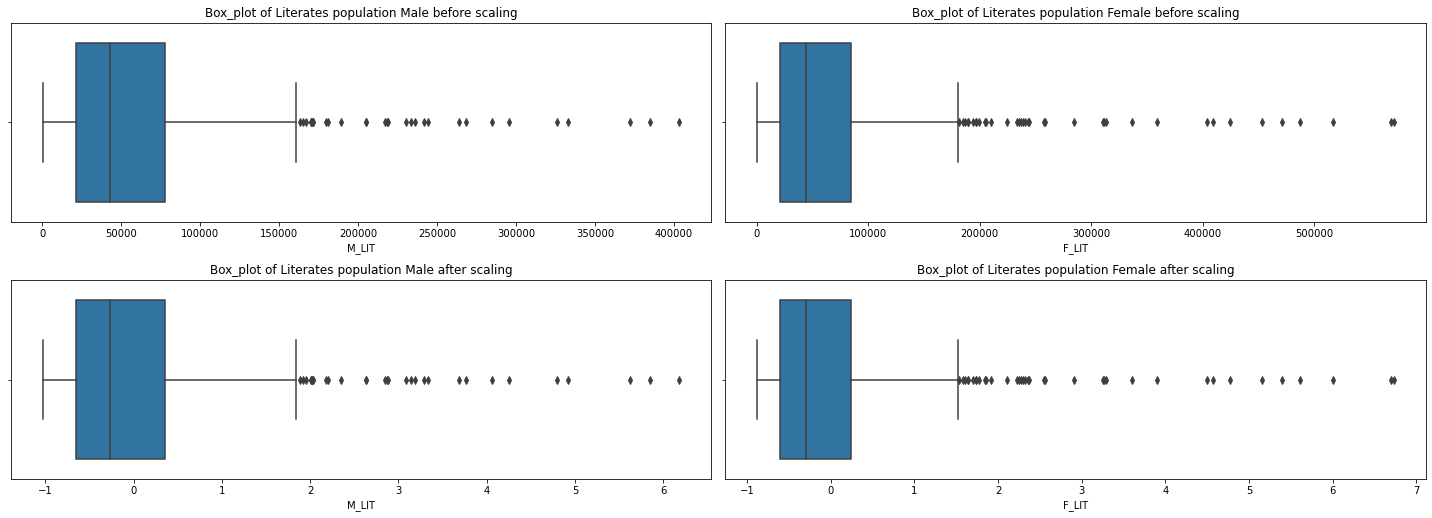

In [607]:
plt.figure(figsize=(20,14))
plt.subplot(4,2,1)
sns.boxplot(data=census_copy,x= 'M_LIT')
plt.title('Box_plot of Literates population Male before scaling')
plt.subplot(4,2,3)
sns.boxplot(data=census_scaled,x= 'M_LIT')
plt.title('Box_plot of Literates population Male after scaling')
plt.tight_layout()
plt.subplot(4,2,2)
sns.boxplot(data=census_copy,x= 'F_LIT')
plt.title('Box_plot of Literates population Female before scaling')
plt.subplot(4,2,4)
sns.boxplot(data=census_scaled,x= 'F_LIT')
plt.title('Box_plot of Literates population Female after scaling')
plt.tight_layout()

In [608]:
# Scaling the data doesnot have any effect on outliers.

### Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector

In [609]:
#Checking corr for sclaed data

<AxesSubplot:>

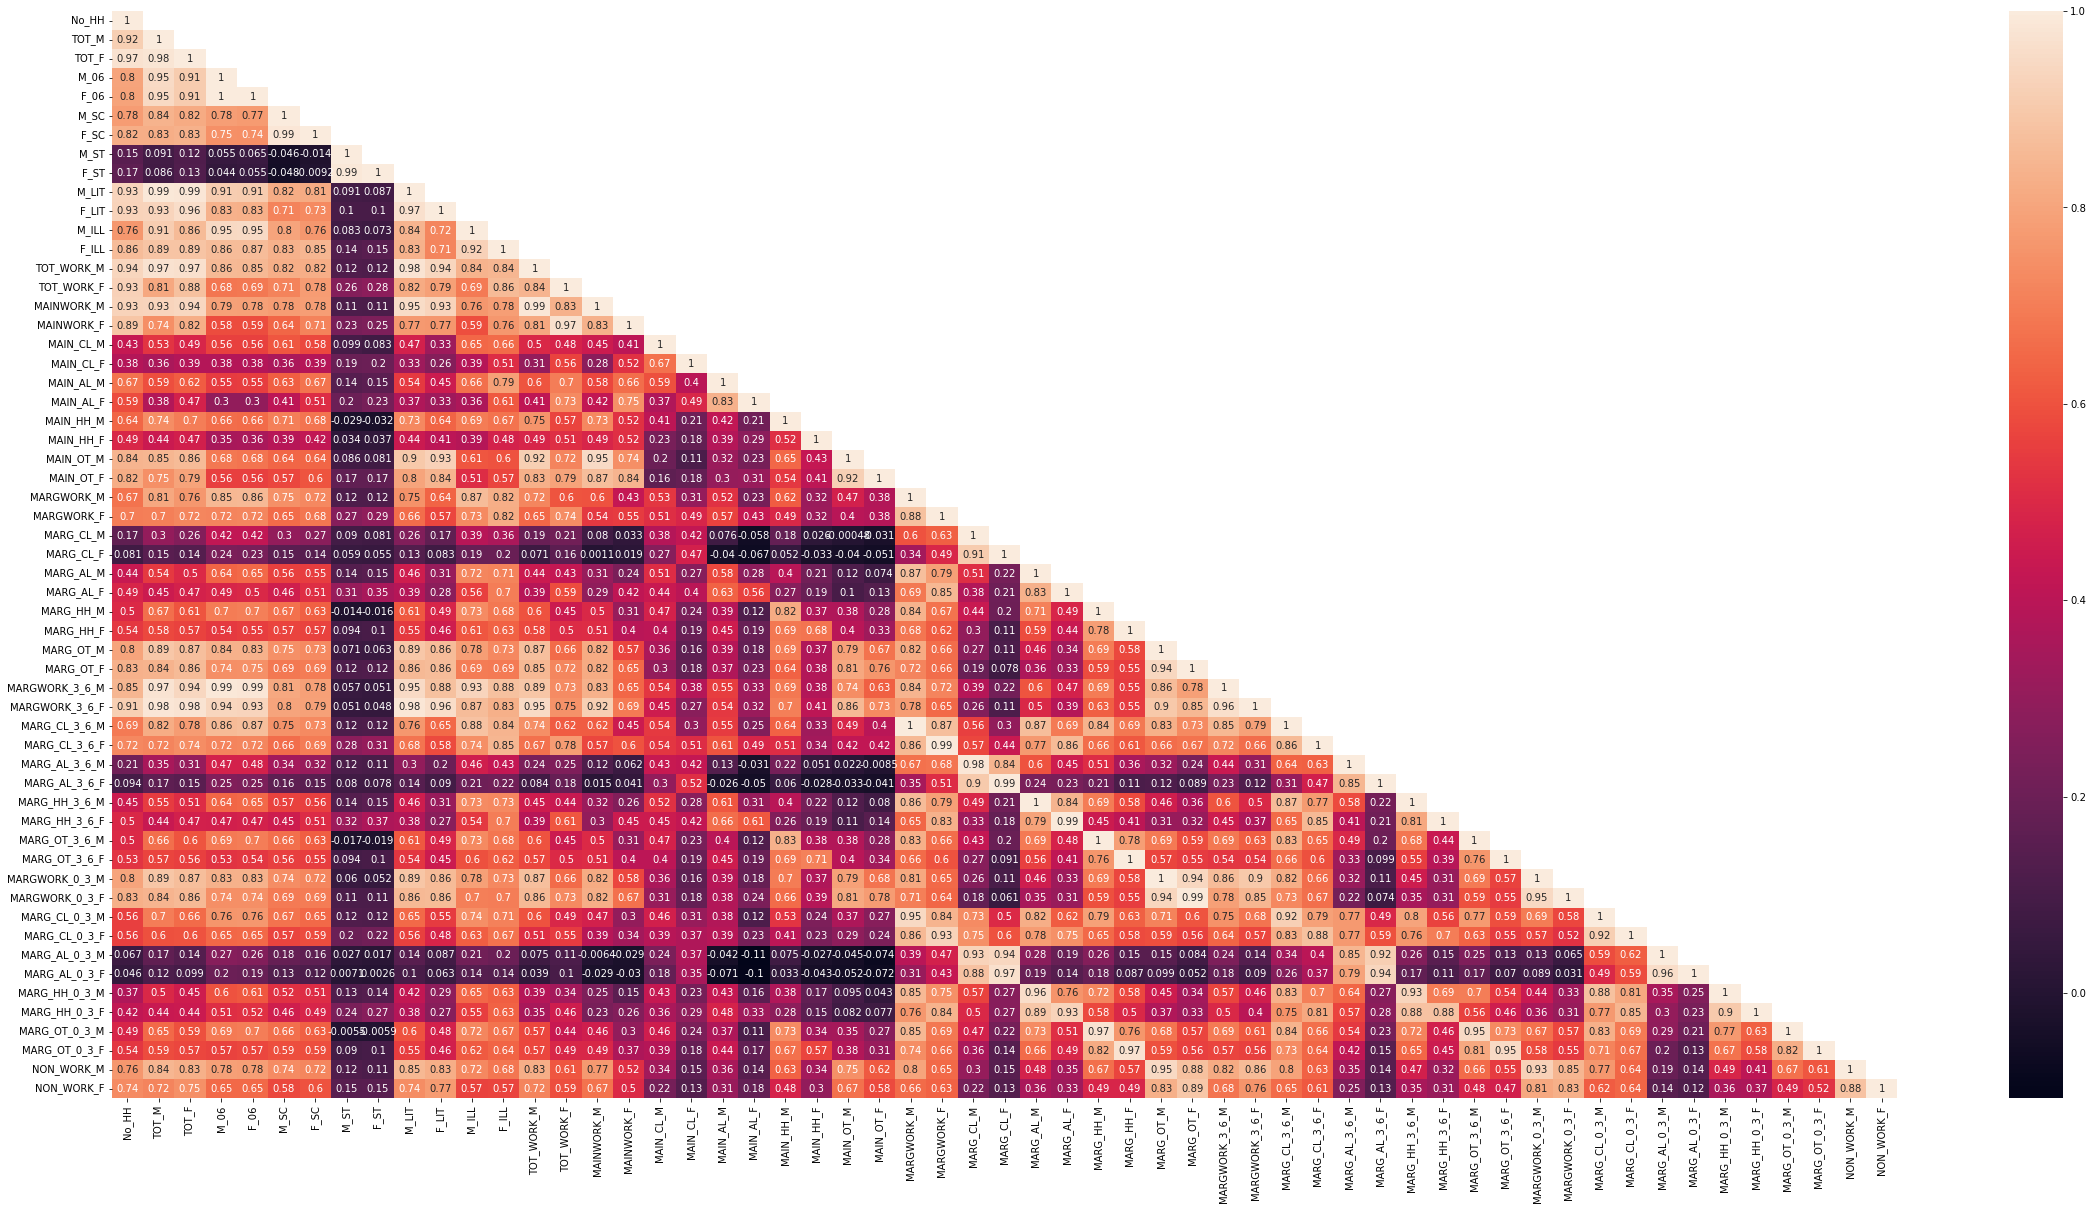

In [610]:
plt.figure(figsize=(40,20))
sns.heatmap(census_scaled.corr(),annot=True,mask=np.triu(census_scaled.corr(),1))

In [611]:
census_scaled.shape

(640, 57)

In [612]:
# Create a covariance matrix for identifying Principal components

In [613]:
cov_matrix = np.cov(census_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00156495 0.91760364 0.97210871 ... 0.53769433 0.76357722 0.73684378]
 [0.91760364 1.00156495 0.98417823 ... 0.5891007  0.84621844 0.71718181]
 [0.97210871 0.98417823 1.00156495 ... 0.572748   0.82894851 0.74775097]
 ...
 [0.53769433 0.5891007  0.572748   ... 1.00156495 0.61052325 0.52191235]
 [0.76357722 0.84621844 0.82894851 ... 0.61052325 1.00156495 0.88228018]
 [0.73684378 0.71718181 0.74775097 ... 0.52191235 0.88228018 1.00156495]]


In [614]:
#Applying PCA for all the columns

In [615]:
from sklearn.decomposition import PCA

In [616]:
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(census_scaled)

In [617]:
pca

PCA(n_components=57, random_state=123)

In [618]:
print(pca_transformed)

[[-4.61726348e+00  1.38115857e-01  3.28544953e-01 ... -6.06029097e-16
   6.08748032e-16  2.96207163e-16]
 [-4.77166187e+00 -1.05865351e-01  2.44448976e-01 ...  2.27457842e-16
   1.68484483e-16  4.64305393e-16]
 [-5.96483558e+00 -2.94346892e-01  3.67393453e-01 ...  4.15150177e-16
  -4.48318483e-17  8.23349729e-16]
 ...
 [-6.29462500e+00 -6.38126644e-01  1.07482817e-01 ...  3.45399264e-16
   1.72137876e-16 -4.11830008e-16]
 [-6.22319199e+00 -6.72319673e-01  2.71325467e-01 ... -1.01201345e-15
  -4.66369483e-16  1.55035951e-16]
 [-5.89623627e+00 -9.37169526e-01  3.49218364e-01 ... -6.19779140e-17
   3.72269309e-16 -5.80404880e-16]]


In [619]:
#Finding eigon_values and eigon_vectors

In [620]:
#Eigon_vector

In [621]:
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.2077636 ,  0.24647657, ..., -0.07217993,
         0.00399206, -0.06929081],
       [ 0.        ,  0.2887035 , -0.20596721, ...,  0.04019745,
        -0.03192722,  0.00778048],
       [-0.        ,  0.18790022,  0.02642675, ..., -0.02597314,
        -0.13972835, -0.02147533]])

In [622]:
#Eigon_vales

In [623]:
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [624]:
#Check the explained variance for each PC

In [625]:
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [626]:
a = ['PC'+ str(i) for i in range(1,58)]
print(a)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57']


In [627]:
census_extracted_loadings = pd.DataFrame(pca.components_.T,columns =['PC'+ str(i) for i in range(1,58)],index = census_scaled.columns)

In [628]:
census_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083   
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389   
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647   
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957   
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436   
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007 -0.064295   
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803 -0.040518   
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163  0.222591   
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792  0.225531   
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101 -0.055465   
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844 -0.048021   
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580 -0.115234   
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119911 -0.028757   
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553 -0.001801   
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437  0.105162   
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802  0.019283   
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834  0.123832   
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039 -0.006170   
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936  0.102951   
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205724 -0.031068   
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605  0.019240   
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089  0.174465   
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441  0.422309   
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638  0.023477   
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743  0.083079   
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244 -0.090761   
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202  0.017868   
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263  0.031915   
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205  0.092086   
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422 -0.141605   
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527 -0.085120   
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971  0.089533   
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602  0.365112   
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121 -0.061066   
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882  0.001739   
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834 -0.136253   
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537 -0.106900   
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073 -0.096708   
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050  0.023773   
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789  0.013477   
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303  0.093993   
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457 -0.144061   
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109 -0.076708   
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400  0.097057   
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810  0.384552   
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829 -0.062043   
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190  0.008962   
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185 -0.060715   
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936 -0.001727   
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849  0.065409   
MARG_AL_0_3_F   0.041786  0.240720  0.28495

### Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

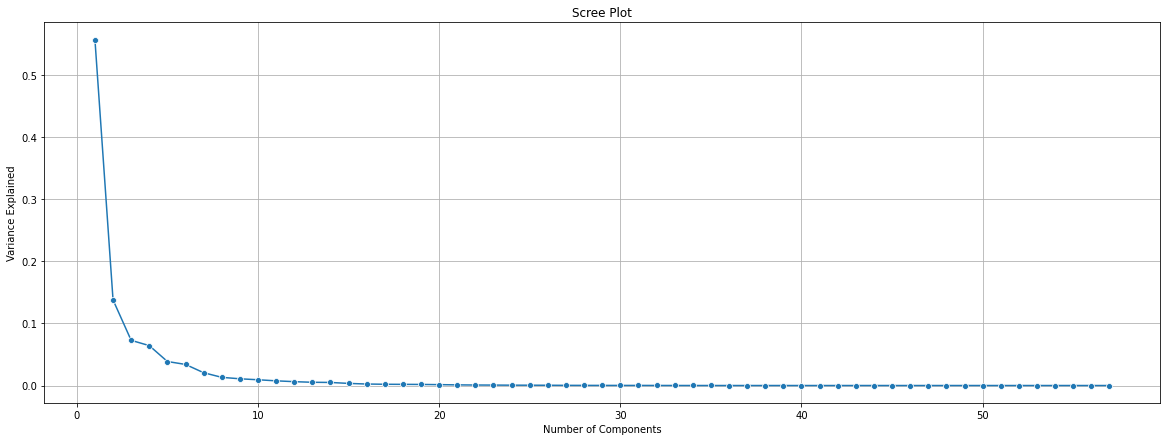

In [629]:
#Create a scree plot
plt.figure(figsize=(20,7))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [630]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
print(np.cumsum(pca.explained_variance_ratio_))

[0.55726063 0.69510499 0.76785794 0.83212212 0.87077261 0.9047243
 0.92532669 0.93848433 0.94929292 0.95854687 0.96607599 0.97226701
 0.97745473 0.98238168 0.98574761 0.98813454 0.99012071 0.99198278
 0.99368693 0.99509011 0.99609921 0.99687687 0.99754058 0.9980597
 0.99853404 0.99894473 0.99919891 0.99939134 0.9995545  0.99969701
 0.99983525 0.99992329 0.9999688  0.9999875  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


In [631]:
#Choose the PCs basis cumulative explained variance
census_selected = census_extracted_loadings[['PC1','PC2','PC3','PC4','PC5','PC6']]

In [632]:
census_selected.T

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
PC1  0.156021  0.167118  0.165553  0.162193  0.162566  0.151358  0.151567   
PC2 -0.126347 -0.089677 -0.104912 -0.022095 -0.020271 -0.045111 -0.051924   
PC3 -0.002690  0.056698  0.038749  0.057788  0.050126  0.002569 -0.025101   
PC4 -0.125293 -0.019942 -0.070873  0.011917  0.014844  0.012485 -0.029893   
PC5 -0.007022 -0.033026 -0.012847 -0.050248 -0.043848 -0.173007 -0.159803   
PC6  0.004083 -0.073389 -0.043647 -0.157957 -0.154436 -0.064295 -0.040518   

         M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
PC1  0.027234  0.028183  0.161993  ...       0.150126       0.140157   
PC2  0.027679  0.030223 -0.115355  ...       0.150681       0.180690   
PC3 -0.123504 -0.139769  0.082168  ...       0.054892       0.023982   
PC4 -0.222247 -0.229754 -0.035163  ...       0.087433      -0.022290   
PC5  0.433163  0.438792 -0.009101  ...       0.081185       0.129936   
PC6  0.222591  0.225531 -0.055465  ...      -0.060715      -0.001727   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
PC1       0.052542       0.041786       0.121840       0.116011   
PC2       0.251328       0.240720       0.185277       0.180616   
PC3       0.268330       0.284956      -0.138628      -0.202198   
PC4      -0.104686      -0.135716       0.132544       0.004051   
PC5      -0.048849      -0.051895       0.062380       0.128308   
PC6       0.065409       0.083743      -0.124209      -0.105530   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
PC1       0.139869       0.132192    0.150376    0.131066  
PC2       0.084869       0.050813   -0.065365   -0.073847  
PC3      -0.022599      -0.078720    0.111827    0.102553  
PC4       0.230038       0.206201    0.084854    0.021124  
PC5      -0.036390       0.000165    0.162862    0.238292  
PC6       0.061228       0.295600   -0.052386   -0.024901  

[6 rows x 57 columns]

### Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

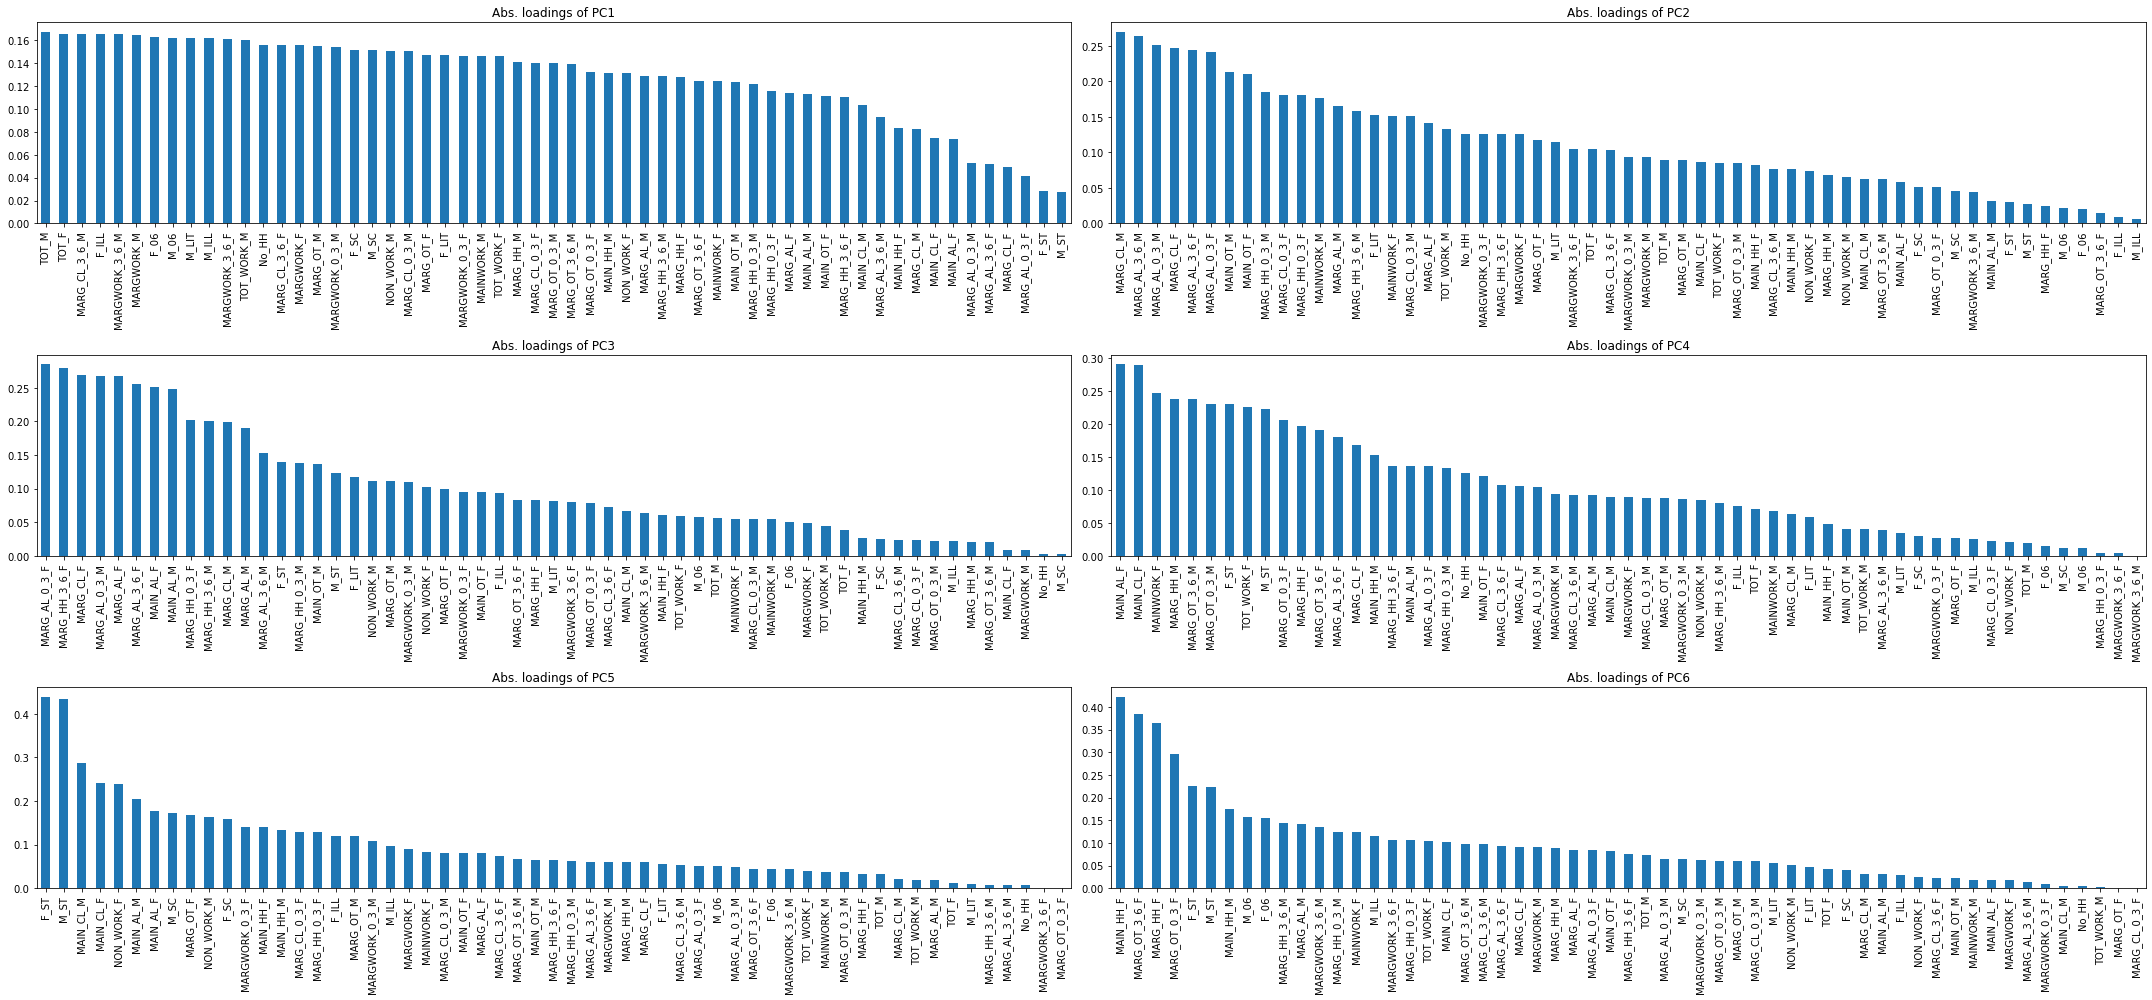

In [633]:
plt.figure(figsize = (30,14))
for i in range(len(census_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(census_selected[census_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.title('Abs. loadings of {}'.format(census_selected.columns[i]))
    plt.tight_layout()

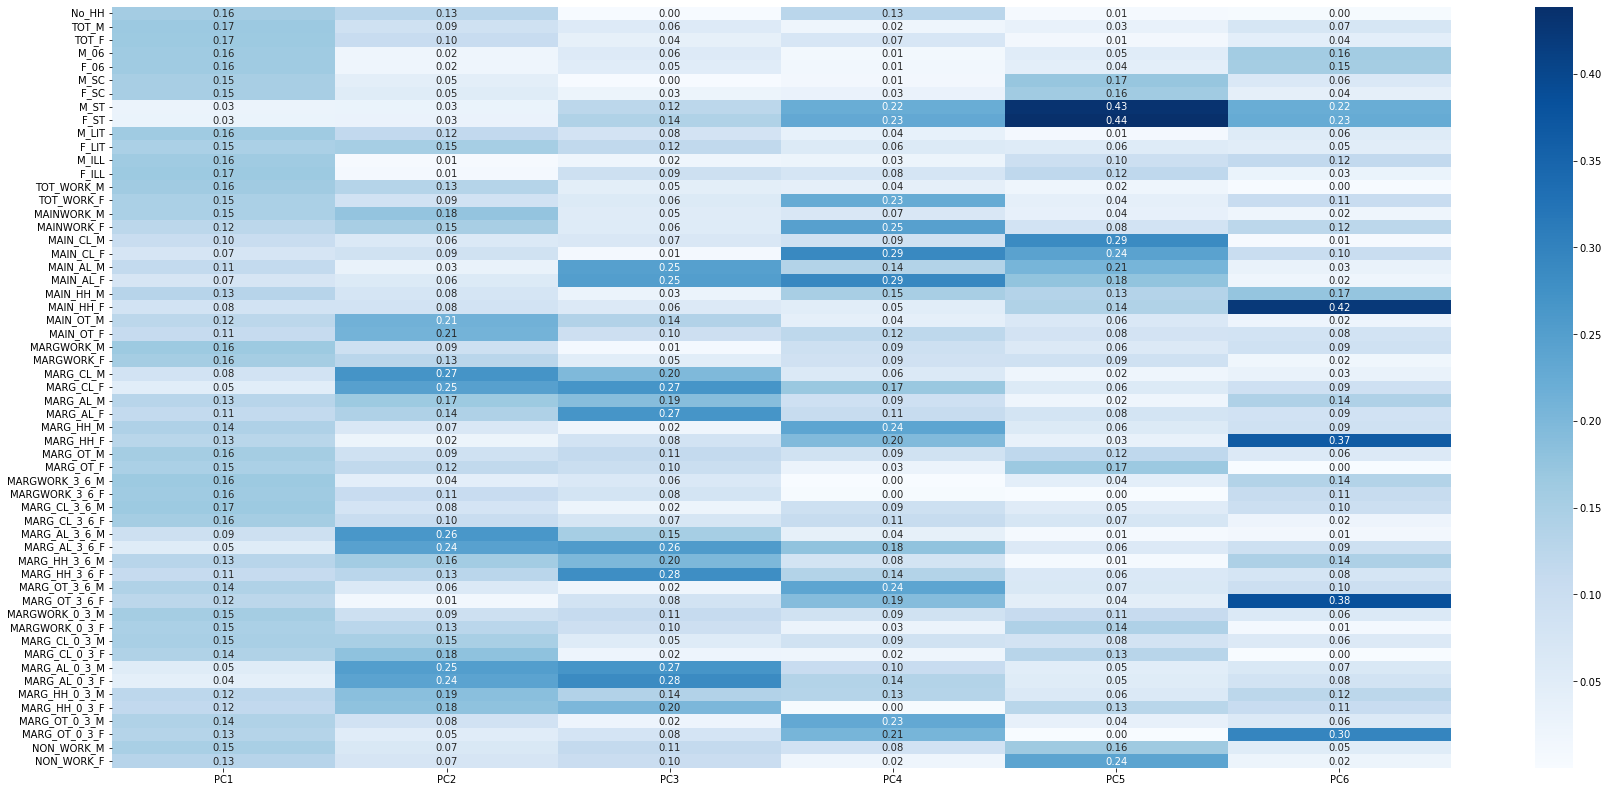

In [634]:
#Compare how the original features influence various PCs
plt.figure(figsize = (30,14))
sns.heatmap(abs(census_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [635]:
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(census_scaled)

In [636]:
pca_final

array([[-4.61726348,  0.13811585,  0.32854489,  1.54369714,  0.35373623,
        -0.42094803],
       [-4.77166187, -0.10586536,  0.24444895,  1.96321495, -0.15388429,
         0.41730835],
       [-5.96483558, -0.29434689,  0.36739354,  0.61954271,  0.47819913,
         0.27658052],
       ...,
       [-6.294625  , -0.63812665,  0.10748279,  1.36818692,  0.15374528,
         0.14114473],
       [-6.22319199, -0.67231967,  0.27132545,  1.14349288,  0.06043998,
        -0.11568247],
       [-5.89623627, -0.93716953,  0.34921832,  1.114861  ,  0.14910357,
        -0.15454413]])

In [637]:
census_selected.index[0:]

Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [638]:
pca_final_df = pd.DataFrame(pca_final, columns = census_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6
0 -4.617263  0.138116  0.328545  1.543697  0.353736 -0.420948
1 -4.771662 -0.105865  0.244449  1.963215 -0.153884  0.417308
2 -5.964836 -0.294347  0.367394  0.619543  0.478199  0.276581
3 -6.280796 -0.500384  0.212701  1.074515  0.300799  0.051157
4 -4.478566  0.894154  1.078277  0.535557  0.804065  0.341678
5 -3.319963  2.823865  3.058460 -0.447904  0.742445  0.634676
6 -5.021393 -0.346359  0.650378  0.981072 -0.059778 -0.246957
7 -4.608709  0.022370  0.398755  1.576995  0.171316 -0.139444
8 -5.186703 -0.059097  0.184397  1.735440  0.169174  0.455039
9 -4.226190 -1.335080  0.697838  1.470509  0.269146 -0.002576

In [639]:
pca_final_df.T

0         1         2         3         4         5         6    \
PC1 -4.617263 -4.771662 -5.964836 -6.280796 -4.478566 -3.319963 -5.021393   
PC2  0.138116 -0.105865 -0.294347 -0.500384  0.894154  2.823865 -0.346359   
PC3  0.328545  0.244449  0.367394  0.212701  1.078277  3.058460  0.650378   
PC4  1.543697  1.963215  0.619543  1.074515  0.535557 -0.447904  0.981072   
PC5  0.353736 -0.153884  0.478199  0.300799  0.804065  0.742445 -0.059778   
PC6 -0.420948  0.417308  0.276581  0.051157  0.341678  0.634676 -0.246957   

          7         8         9    ...       630       631       632  \
PC1 -4.608709 -5.186703 -4.226190  ...  0.231290  2.233075 -0.425308   
PC2  0.022370 -0.059097 -1.335080  ... -0.986332 -4.733497 -3.210692   
PC3  0.398755  0.184397  0.697838  ... -0.788338  0.651248 -0.142504   
PC4  1.576995  1.735440  1.470509  ... -0.856567 -1.613116 -1.539146   
PC5  0.171316  0.169174  0.269146  ... -1.141717 -0.407586 -0.869835   
PC6 -0.139444  0.455039 -0.002576  ...  0.071518  0.576427  0.630854   

          633       634       635       636       637       638       639  
PC1 -6.462810 -3.600282 -6.262088 -5.767714 -6.294625 -6.223192 -5.896236  
PC2 -0.731394 -1.763401 -0.854414 -0.900436 -0.638127 -0.672320 -0.937170  
PC3  0.120313  0.288760  0.242575  0.168051  0.107483  0.271325  0.349218  
PC4  1.168501  0.543656  1.174113  1.102774  1.368187  1.143493  1.114861  
PC5 -0.002325 -0.045289  0.063816  0.055179  0.153745  0.060440  0.149104  
PC6 -0.086795 -0.355948 -0.159470 -0.156458  0.141145 -0.115682 -0.154544  

[6 rows x 640 columns]

In [640]:
pca_final_df.corr()

PC1           PC2           PC3           PC4           PC5  \
PC1  1.000000e+00  1.535547e-16 -1.076170e-16  3.653845e-17  5.163546e-17   
PC2  1.535547e-16  1.000000e+00 -1.788472e-17 -1.761625e-16  1.778289e-17   
PC3 -1.076170e-16 -1.788472e-17  1.000000e+00  4.192504e-16 -1.005367e-16   
PC4  3.653845e-17 -1.761625e-16  4.192504e-16  1.000000e+00  1.429077e-16   
PC5  5.163546e-17  1.778289e-17 -1.005367e-16  1.429077e-16  1.000000e+00   
PC6  9.759612e-17 -5.573071e-17 -1.106783e-16  5.354019e-17 -1.478158e-16   

              PC6  
PC1  9.759612e-17  
PC2 -5.573071e-17  
PC3 -1.106783e-16  
PC4  5.354019e-17  
PC5 -1.478158e-16  
PC6  1.000000e+00

<AxesSubplot:>

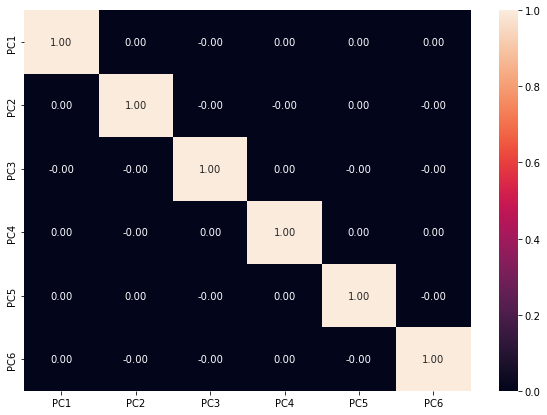

In [641]:
plt.figure(figsize=(10,7))
sns.heatmap(pca_final_df.corr(),annot=True,fmt='.2f')

In [642]:
census_selected.head()

PC1       PC2       PC3       PC4       PC5       PC6
No_HH  0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083
TOT_M  0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389
TOT_F  0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647
M_06   0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957
F_06   0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436

#### Write linear equation for first PC.

In [643]:
counter = 0
for i in range(0,57):
    counter = counter+1
    if(counter != (range(0,59))):
        print(census_selected.iloc[i,0],'*',census_selected.index[i],"+",)
    else:
        print(census_selected.iloc[i,0],'*',census_selected.index[i])

0.15602057858567936 * No_HH +
0.1671176348853345 * TOT_M +
0.16555317909064893 * TOT_F +
0.1621929482046555 * M_06 +
0.16256639565734832 * F_06 +
0.15135784909060582 * M_SC +
0.15156650019208875 * F_SC +
0.02723419457100423 * M_ST +
0.028183315015872692 * F_ST +
0.16199283733629155 * M_LIT +
0.14687268030140285 * F_LIT +
0.16174944463471633 * M_ILL +
0.16524818736833372 * F_ILL +
0.15987198816201284 * TOT_WORK_M +
0.1459358037724762 * TOT_WORK_F +
0.1462007297630599 * MAINWORK_M +
0.12397028357273648 * MAINWORK_F +
0.10312715883019867 * MAIN_CL_M +
0.07453978555483677 * MAIN_CL_F +
0.11335571218156723 * MAIN_AL_M +
0.07388215903155881 * MAIN_AL_F +
0.131572584022756 * MAIN_HH_M +
0.08338263967435766 * MAIN_HH_F +
0.12352624192253084 * MAIN_OT_M +
0.1110212639132013 * MAIN_OT_F +
0.1646154785601101 * MARGWORK_M +
0.1553956181083413 * MARGWORK_F +
0.08238854140704546 * MARG_CL_M +
0.049195395678738256 * MARG_CL_F +
0.12859856294668565 * MARG_AL_M +
0.11430507278919895 * MARG_AL_F +
0.140

In [644]:
census_selected.iloc[0,0]

0.15602057858567936

In [645]:
census_selected.index[0]

'No_HH'

In [646]:
print('The first eigen vector is:')
counter = 0
for i in range(0,58):
    counter = counter+1
    if(counter != (range(0,58))):
        print(pca.components_[i,0],'*',census_selected.columns[i],"+")
    else:
        print(pca.components_[i,0],'*',census_selected.columns[i])

The first eigen vector is:
0.15602057858558882 * PC1 +
-0.12634652542610048 * PC2 +
-0.002690248364293124 * PC3 +
-0.12529336723733792 * PC4 +
-0.00702205907697739 * PC5 +
0.004082919723788884 * PC6 +


IndexError: index 6 is out of bounds for axis 0 with size 6

In [647]:
#...and we need the original scaled features
census_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [648]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in census_selected.columns:
    pc_score = np.dot(census_selected[i], census_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-4.617263 0.138116 0.328545 1.543697 0.353737 -0.420947 

In [649]:
census_selected.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], dtype='object')

In [650]:
census_selected['PC1']

No_HH             0.156021
TOT_M             0.167118
TOT_F             0.165553
M_06              0.162193
F_06              0.162566
M_SC              0.151358
F_SC              0.151567
M_ST              0.027234
F_ST              0.028183
M_LIT             0.161993
F_LIT             0.146873
M_ILL             0.161749
F_ILL             0.165248
TOT_WORK_M        0.159872
TOT_WORK_F        0.145936
MAINWORK_M        0.146201
MAINWORK_F        0.123970
MAIN_CL_M         0.103127
MAIN_CL_F         0.074540
MAIN_AL_M         0.113356
MAIN_AL_F         0.073882
MAIN_HH_M         0.131573
MAIN_HH_F         0.083383
MAIN_OT_M         0.123526
MAIN_OT_F         0.111021
MARGWORK_M        0.164615
MARGWORK_F        0.155396
MARG_CL_M         0.082389
MARG_CL_F         0.049195
MARG_AL_M         0.128599
MARG_AL_F         0.114305
MARG_HH_M         0.140853
MARG_HH_F         0.127670
MARG_OT_M         0.155263
MARG_OT_F         0.147287
MARGWORK_3_6_M    0.164972
MARGWORK_3_6_F    0.161253
M